Walkthrough of data processing for the VIEWR
=============================================

Jianyi Du, Piled Higher and Deeper

Stanford University

May 2023

Imports of libraries
-------

Import necessary libraries for dataprocessing

In [1]:
# --------------------------------------------------------------------------- #
# --------------------------------------------------------------------------- #
# ----         __   __   ________  ______   __ __ __   ______            ---- #
# ----        /_/\ /_/\ /_______/\/_____/\ /_//_//_/\ /_____/\           ---- #
# ----        \:\ \\ \ \\__.::._\/\::::_\/_\:\\:\\:\ \\:::_ \ \          ---- #
# ----         \:\ \\ \ \  \::\ \  \:\/___/\\:\\:\\:\ \\:(_) ) )_        ---- #
# ----          \:\_/.:\ \ _\::\ \__\::___\/_\:\\:\\:\ \\: __ `\ \       ---- #
# ----           \ ..::/ //__\::\__/\\:\____/\\:\\:\\:\ \\ \ `\ \ \      ---- #
# ----            \___/_( \________\/ \_____\/ \_______\/ \_\/ \_\/      ---- #
# ----                                                                   ---- #
# ----                                                     v.0.1         ---- #
# --------------------------------------------------------------------------- #
# --------------------------------------------------------------------------- #

import numpy as np 
import json
import matplotlib.pyplot as plt



Copy and paste the ***ADC_LUT*** from executing *esp32-adc-calibrate* to calibrate the ADC. 

***ADC_LUT*** should be a 1x4096 array (depending on the microcontroller resolution this value may be different), where the input is the raw input from *analogRead*, and the output is the calibrated output.


In [2]:
ADC_LUT = [ 0,
49.0000,50.4000,52.0000,53.4000,55.0000,56.4000,57.8000,59.4000,60.8000,62.4000,63.8000,65.0000,66.8000,68.0000,69.4000,
70.8000,72.0000,73.6000,75.0000,76.2000,77.8000,79.0000,80.4000,81.2000,82.2000,83.2000,84.2000,85.2000,86.2000,87.2000,
88.2000,89.2000,90.2000,91.2000,92.2000,93.0000,94.0000,95.0000,96.0000,97.4000,98.8000,99.8000,101.0000,102.0000,103.2000,
104.6000,105.8000,106.8000,108.0000,109.2000,110.4000,111.8000,112.8000,114.0000,115.4000,116.8000,117.8000,119.0000,120.4000,121.8000,
123.0000,124.0000,125.4000,126.8000,128.0000,129.0000,130.0000,131.0000,132.2000,133.4000,134.4000,135.6000,136.8000,137.8000,138.8000,
139.8000,140.8000,142.0000,143.0000,144.0000,145.0000,146.4000,147.6000,148.8000,149.8000,150.8000,152.0000,153.0000,154.2000,155.4000,
156.8000,157.8000,158.8000,160.0000,161.0000,162.0000,163.0000,164.0000,165.0000,166.0000,167.0000,168.0000,169.0000,170.0000,171.0000,
172.0000,173.0000,174.0000,175.0000,176.2000,177.8000,179.0000,180.6000,181.8000,183.2000,184.8000,186.0000,187.4000,188.8000,190.0000,
191.8000,192.8000,194.0000,195.0000,196.0000,197.0000,198.0000,199.2000,200.4000,201.6000,202.8000,203.8000,204.8000,205.8000,206.8000,
208.0000,209.2000,210.8000,212.0000,213.8000,215.0000,216.8000,218.0000,219.6000,221.0000,222.2000,223.8000,224.8000,225.8000,226.8000,
227.4000,228.2000,229.0000,230.0000,230.8000,231.8000,232.8000,233.6000,234.4000,235.0000,236.0000,237.0000,237.8000,238.8000,239.8000,
240.8000,242.0000,243.2000,244.8000,246.0000,247.4000,248.8000,250.0000,251.8000,253.0000,254.2000,255.8000,256.8000,257.8000,258.8000,
259.8000,261.0000,262.0000,263.0000,264.0000,265.0000,266.0000,267.0000,268.0000,269.0000,270.0000,271.0000,272.0000,273.2000,274.4000,
275.8000,276.8000,277.8000,279.0000,280.0000,281.4000,282.6000,283.8000,284.8000,286.0000,287.0000,288.2000,289.4000,290.6000,291.8000,
292.8000,293.8000,295.0000,296.0000,297.0000,298.2000,299.4000,300.8000,301.8000,302.8000,303.8000,305.0000,306.0000,307.0000,308.0000,
309.0000,310.2000,311.2000,312.4000,313.6000,314.6000,315.8000,316.8000,317.8000,318.8000,319.8000,321.0000,322.0000,323.2000,324.4000,
325.8000,326.8000,328.0000,329.0000,330.2000,331.4000,332.8000,333.8000,335.0000,336.0000,337.0000,338.0000,339.2000,340.4000,341.4000,
342.6000,343.8000,344.8000,345.8000,346.8000,347.8000,349.0000,350.0000,351.0000,352.0000,353.6000,354.8000,356.0000,357.8000,359.0000,
360.4000,361.8000,363.0000,364.6000,365.8000,367.0000,368.6000,369.6000,370.6000,371.6000,372.6000,373.6000,374.6000,375.6000,376.6000,
377.6000,378.6000,379.6000,380.6000,381.6000,382.6000,383.6000,384.6000,385.8000,386.8000,388.0000,389.0000,390.4000,391.8000,392.8000,
394.0000,395.0000,396.2000,397.4000,398.8000,399.8000,401.0000,402.0000,403.0000,404.0000,405.2000,406.4000,407.6000,408.8000,409.8000,
410.8000,411.8000,413.0000,414.0000,415.0000,416.2000,417.4000,418.6000,419.8000,420.8000,421.8000,422.8000,423.8000,425.0000,426.0000,
427.0000,428.0000,429.2000,430.4000,431.6000,432.8000,434.0000,435.4000,436.8000,438.0000,439.6000,440.8000,442.0000,443.8000,445.0000,
446.2000,447.8000,448.8000,449.8000,450.8000,451.8000,452.6000,453.4000,454.4000,455.2000,456.0000,457.0000,458.0000,459.0000,460.0000,
461.0000,461.8000,462.8000,463.8000,464.8000,466.2000,467.8000,469.0000,470.8000,472.0000,473.4000,474.8000,476.0000,477.8000,479.0000,
480.4000,481.4000,482.4000,483.2000,484.2000,485.2000,486.2000,487.0000,488.0000,489.0000,490.0000,491.0000,492.0000,493.0000,494.0000,
495.0000,496.0000,502.8000,511.0000,513.0000,514.2000,515.6000,516.8000,517.8000,519.0000,520.0000,521.2000,522.6000,523.8000,524.8000,
526.0000,527.0000,528.2000,529.4000,530.6000,531.8000,532.8000,533.8000,535.0000,536.0000,537.0000,538.2000,539.4000,540.6000,541.8000,
542.8000,543.8000,545.0000,546.0000,547.0000,548.0000,549.0000,550.0000,551.2000,552.2000,553.4000,554.4000,555.6000,556.6000,557.8000,
558.8000,559.8000,560.8000,562.0000,563.6000,564.8000,566.0000,567.6000,568.8000,570.0000,571.6000,572.8000,574.0000,575.4000,576.8000,
577.8000,578.8000,580.0000,581.0000,582.0000,583.0000,584.2000,585.4000,586.6000,587.6000,588.8000,589.8000,590.8000,592.0000,593.0000,
594.0000,595.0000,596.2000,597.6000,598.8000,599.8000,600.8000,602.0000,603.0000,604.0000,605.0000,606.2000,607.6000,608.6000,609.6000,
610.4000,611.4000,612.4000,613.2000,614.2000,615.0000,616.0000,617.0000,618.0000,619.0000,620.0000,621.0000,622.0000,623.0000,623.8000,
625.0000,626.6000,627.8000,629.0000,630.6000,631.8000,633.0000,634.6000,635.8000,637.0000,638.6000,639.8000,640.8000,641.8000,642.4000,
643.0000,644.0000,644.8000,645.8000,646.6000,647.2000,648.0000,649.0000,649.8000,650.6000,651.2000,652.0000,653.0000,653.8000,654.8000,
655.4000,656.0000,657.6000,658.8000,660.0000,661.2000,662.8000,663.8000,665.0000,666.4000,667.8000,669.0000,670.0000,671.6000,672.8000,
673.6000,674.2000,675.0000,676.0000,677.0000,677.8000,678.8000,679.6000,680.4000,681.0000,682.0000,683.0000,683.8000,684.8000,685.8000,
686.4000,687.2000,688.0000,689.8000,691.0000,692.6000,694.0000,695.6000,697.0000,698.4000,699.8000,701.2000,702.8000,704.0000,705.2000,
706.6000,707.8000,708.8000,709.8000,711.0000,712.0000,713.0000,714.0000,715.2000,716.6000,717.8000,718.8000,719.8000,721.0000,722.8000,
724.0000,725.8000,727.0000,728.8000,730.2000,731.8000,733.2000,734.8000,736.2000,737.0000,738.0000,739.0000,740.0000,741.0000,742.0000,
743.0000,744.0000,745.0000,746.0000,746.8000,747.8000,748.8000,749.8000,750.8000,751.8000,752.8000,753.8000,755.0000,756.0000,757.0000,
758.0000,759.2000,760.4000,761.6000,762.8000,763.8000,764.8000,765.8000,767.0000,768.0000,769.0000,770.2000,771.4000,772.8000,773.8000,
774.8000,776.0000,777.0000,778.0000,779.4000,780.6000,781.8000,782.8000,783.8000,785.0000,786.0000,787.0000,788.2000,789.4000,790.6000,
791.8000,792.8000,793.8000,795.0000,796.0000,797.0000,798.2000,799.4000,800.6000,801.8000,802.8000,803.8000,804.8000,806.0000,807.0000,
808.0000,809.2000,810.4000,811.6000,812.8000,813.8000,814.8000,816.0000,817.0000,818.0000,819.0000,820.2000,821.4000,822.6000,823.8000,
824.8000,825.8000,827.0000,828.0000,829.0000,830.0000,831.2000,832.6000,833.8000,835.0000,836.4000,837.8000,839.0000,840.2000,841.8000,
842.8000,844.0000,845.6000,846.8000,848.0000,849.0000,850.2000,851.4000,852.6000,853.8000,854.8000,855.8000,857.0000,858.0000,859.0000,
860.4000,861.6000,862.8000,863.8000,864.8000,866.0000,867.0000,868.4000,869.8000,870.8000,872.0000,873.0000,874.2000,875.6000,876.8000,
877.8000,879.0000,880.0000,881.2000,882.4000,883.6000,884.8000,885.8000,886.8000,887.8000,889.0000,890.0000,891.0000,892.2000,893.4000,
894.6000,895.6000,896.8000,897.8000,898.8000,900.0000,901.0000,902.0000,903.0000,904.2000,905.4000,906.6000,907.8000,908.8000,909.8000,
910.8000,912.0000,913.0000,914.4000,915.8000,916.8000,918.0000,919.2000,920.6000,921.8000,923.0000,924.0000,925.4000,926.8000,928.0000,
929.0000,930.0000,931.0000,931.8000,932.8000,933.8000,934.8000,935.8000,936.8000,937.8000,938.8000,939.8000,940.8000,941.8000,942.8000,
943.8000,944.8000,946.0000,947.4000,948.8000,950.0000,951.4000,952.8000,954.0000,955.4000,956.8000,958.0000,959.4000,960.6000,961.4000,
962.2000,963.0000,964.0000,965.0000,965.8000,966.8000,967.8000,968.8000,969.4000,970.2000,971.0000,972.0000,973.0000,973.8000,974.8000,
975.8000,976.8000,978.0000,979.2000,980.8000,981.8000,983.0000,984.4000,985.8000,987.0000,988.0000,989.6000,990.8000,992.0000,993.2000,
994.6000,995.8000,996.8000,998.0000,999.0000,1000.2000,1001.6000,1002.8000,1003.8000,1005.0000,1006.0000,1007.4000,1008.8000,1009.8000,1011.0000,
1012.4000,1013.8000,1014.8000,1016.0000,1017.4000,1018.8000,1019.8000,1021.0000,1022.4000,1023.8000,1024.8000,1025.8000,1026.8000,1027.8000,1028.8000,
1029.8000,1030.8000,1031.8000,1032.8000,1033.6000,1034.6000,1035.6000,1036.6000,1037.6000,1038.4000,1039.4000,1040.4000,1041.8000,1042.8000,1043.8000,
1045.0000,1046.0000,1047.2000,1048.6000,1049.8000,1050.8000,1052.0000,1053.0000,1054.0000,1055.4000,1056.6000,1057.8000,1059.0000,1060.0000,1061.2000,
1062.6000,1063.8000,1064.8000,1066.0000,1067.2000,1068.6000,1069.8000,1070.8000,1072.0000,1073.0000,1074.0000,1075.0000,1076.0000,1077.0000,1078.0000,
1079.0000,1080.0000,1081.0000,1082.0000,1083.0000,1084.0000,1085.0000,1086.2000,1087.2000,1088.2000,1089.8000,1091.0000,1092.2000,1093.8000,1094.8000,
1096.0000,1097.6000,1098.8000,1100.0000,1101.4000,1102.8000,1104.0000,1105.0000,1105.8000,1106.8000,1107.8000,1108.4000,1109.2000,1110.0000,1111.0000,
1112.0000,1112.8000,1113.8000,1114.6000,1115.4000,1116.0000,1117.0000,1118.0000,1118.8000,1119.8000,1120.8000,1121.8000,1123.0000,1124.0000,1125.4000,
1126.6000,1127.8000,1128.8000,1130.0000,1131.0000,1132.4000,1133.8000,1134.8000,1135.8000,1137.4000,1139.0000,1140.6000,1142.0000,1143.8000,1145.0000,
1146.8000,1148.2000,1150.0000,1151.6000,1152.8000,1153.8000,1154.8000,1155.8000,1156.8000,1157.8000,1158.8000,1159.8000,1160.8000,1161.8000,1163.0000,
1164.0000,1165.0000,1166.0000,1167.0000,1168.0000,1169.0000,1170.0000,1171.0000,1172.0000,1173.0000,1174.0000,1175.0000,1176.0000,1177.0000,1178.0000,
1179.0000,1180.0000,1181.0000,1182.2000,1183.2000,1184.2000,1185.4000,1186.6000,1187.8000,1188.8000,1189.8000,1191.0000,1192.0000,1193.0000,1194.4000,
1195.6000,1196.8000,1197.8000,1198.8000,1200.0000,1201.0000,1201.8000,1202.8000,1203.8000,1204.8000,1205.6000,1206.4000,1207.4000,1208.2000,1209.0000,
1210.0000,1211.0000,1212.0000,1212.8000,1213.8000,1214.8000,1215.8000,1216.8000,1217.8000,1218.8000,1220.0000,1221.0000,1222.0000,1223.2000,1224.4000,
1225.6000,1226.8000,1227.8000,1228.8000,1229.8000,1231.0000,1232.0000,1233.0000,1234.0000,1234.8000,1235.8000,1236.8000,1237.6000,1238.4000,1239.2000,
1240.0000,1241.0000,1242.0000,1242.8000,1243.8000,1244.8000,1245.6000,1246.4000,1247.2000,1248.0000,1249.2000,1250.4000,1251.6000,1252.8000,1253.8000,
1254.8000,1256.0000,1257.0000,1258.0000,1259.0000,1260.2000,1261.4000,1262.6000,1263.8000,1264.8000,1266.0000,1267.0000,1268.2000,1269.6000,1270.8000,
1272.0000,1273.0000,1274.2000,1275.6000,1276.8000,1277.8000,1279.0000,1280.0000,1281.2000,1282.4000,1283.6000,1284.8000,1285.8000,1286.8000,1287.8000,
1289.0000,1290.0000,1291.0000,1292.2000,1293.4000,1294.6000,1295.8000,1296.8000,1298.0000,1299.0000,1300.4000,1301.8000,1303.0000,1304.0000,1305.4000,
1306.8000,1307.8000,1309.0000,1310.4000,1311.8000,1312.8000,1313.8000,1314.6000,1315.6000,1316.4000,1317.2000,1318.2000,1319.0000,1320.0000,1321.0000,
1322.0000,1323.0000,1323.8000,1324.8000,1325.8000,1326.8000,1327.8000,1328.8000,1330.0000,1331.6000,1332.8000,1334.2000,1335.8000,1337.0000,1338.6000,
1340.0000,1341.4000,1342.8000,1344.0000,1345.0000,1346.0000,1347.2000,1348.2000,1349.2000,1350.4000,1351.4000,1352.4000,1353.4000,1354.6000,1355.6000,
1356.6000,1357.8000,1358.8000,1359.8000,1360.8000,1361.8000,1362.8000,1364.0000,1365.0000,1366.0000,1367.0000,1368.2000,1369.4000,1370.6000,1371.8000,
1372.8000,1373.8000,1374.8000,1376.0000,1377.0000,1378.0000,1379.0000,1380.0000,1381.0000,1382.0000,1383.2000,1384.2000,1385.4000,1386.4000,1387.6000,
1388.6000,1389.8000,1390.8000,1391.8000,1392.8000,1394.0000,1395.6000,1396.8000,1398.0000,1399.6000,1400.8000,1402.0000,1403.6000,1404.8000,1406.0000,
1407.6000,1408.8000,1409.8000,1410.8000,1411.8000,1412.8000,1413.8000,1414.8000,1416.0000,1417.0000,1418.0000,1419.0000,1420.0000,1421.0000,1422.0000,
1423.0000,1424.0000,1425.4000,1426.8000,1427.8000,1429.0000,1430.0000,1431.2000,1432.6000,1433.8000,1434.8000,1436.0000,1437.2000,1438.6000,1439.8000,
1440.8000,1441.8000,1442.8000,1443.8000,1444.8000,1445.8000,1446.8000,1447.8000,1448.8000,1449.8000,1450.8000,1451.8000,1452.8000,1453.8000,1454.8000,
1455.8000,1456.8000,1458.0000,1459.4000,1460.8000,1462.0000,1463.2000,1464.8000,1465.8000,1467.0000,1468.6000,1469.8000,1471.0000,1472.2000,1473.4000,
1474.4000,1475.4000,1476.6000,1477.6000,1478.6000,1479.8000,1480.8000,1481.8000,1482.8000,1483.8000,1484.8000,1485.8000,1486.8000,1487.8000,1489.0000,
1490.0000,1491.0000,1492.0000,1493.2000,1494.6000,1495.8000,1496.8000,1497.8000,1498.8000,1500.0000,1501.0000,1502.0000,1503.2000,1504.4000,1505.8000,
1507.0000,1508.8000,1510.0000,1511.4000,1512.8000,1514.2000,1515.8000,1517.0000,1518.6000,1519.8000,1522.8000,1525.8000,1529.0000,1532.0000,1535.2000,
1537.0000,1538.0000,1539.0000,1540.0000,1541.0000,1542.0000,1543.2000,1544.2000,1545.4000,1546.4000,1547.6000,1548.6000,1549.8000,1550.8000,1551.8000,
1552.8000,1553.8000,1554.8000,1555.8000,1557.0000,1558.0000,1559.0000,1560.0000,1561.0000,1562.0000,1563.2000,1564.2000,1565.4000,1566.4000,1567.6000,
1568.6000,1569.8000,1570.8000,1571.8000,1573.0000,1574.0000,1575.0000,1576.2000,1577.4000,1578.6000,1579.8000,1580.8000,1581.8000,1583.0000,1584.0000,
1585.0000,1586.4000,1587.8000,1588.8000,1590.0000,1591.2000,1592.6000,1593.8000,1594.8000,1596.0000,1597.2000,1598.6000,1599.8000,1600.8000,1602.0000,
1603.0000,1604.0000,1605.2000,1606.6000,1607.8000,1608.8000,1609.8000,1611.0000,1612.0000,1613.0000,1614.2000,1615.4000,1616.6000,1617.8000,1618.8000,
1619.8000,1620.8000,1621.8000,1622.8000,1623.8000,1624.8000,1626.0000,1627.0000,1628.0000,1629.0000,1630.0000,1631.0000,1632.0000,1633.4000,1634.6000,
1635.8000,1636.8000,1638.0000,1639.0000,1640.2000,1641.6000,1642.8000,1643.8000,1645.0000,1646.0000,1647.2000,1648.4000,1649.8000,1650.8000,1652.0000,
1653.0000,1654.2000,1655.6000,1656.8000,1657.8000,1659.0000,1660.0000,1661.4000,1662.8000,1663.8000,1664.8000,1666.0000,1667.0000,1668.0000,1669.0000,
1670.2000,1671.4000,1672.4000,1673.6000,1674.8000,1675.8000,1676.8000,1677.8000,1679.0000,1680.0000,1681.0000,1682.0000,1683.0000,1684.0000,1685.0000,
1686.0000,1687.0000,1688.2000,1689.2000,1690.2000,1691.4000,1692.4000,1693.4000,1694.4000,1695.6000,1696.6000,1697.8000,1699.0000,1700.0000,1701.2000,
1702.6000,1703.8000,1704.8000,1706.0000,1707.2000,1708.6000,1709.8000,1710.8000,1712.0000,1713.2000,1714.8000,1716.0000,1717.2000,1718.8000,1720.0000,
1721.2000,1722.8000,1724.0000,1725.2000,1726.8000,1728.0000,1729.0000,1730.0000,1731.2000,1732.4000,1733.6000,1734.6000,1735.8000,1736.8000,1737.8000,
1738.8000,1740.0000,1741.0000,1742.0000,1743.0000,1744.2000,1745.2000,1746.2000,1747.2000,1748.2000,1749.2000,1750.2000,1751.2000,1752.2000,1753.2000,
1754.2000,1755.2000,1756.2000,1757.2000,1758.2000,1759.2000,1760.4000,1761.6000,1762.8000,1763.8000,1764.8000,1766.0000,1767.0000,1768.0000,1769.2000,
1770.6000,1771.8000,1772.8000,1773.8000,1775.0000,1776.0000,1777.0000,1778.0000,1779.0000,1780.0000,1781.0000,1782.0000,1783.0000,1784.0000,1785.0000,
1786.0000,1787.0000,1788.0000,1789.0000,1790.0000,1791.0000,1791.8000,1792.8000,1793.8000,1794.8000,1795.8000,1796.8000,1797.8000,1798.8000,1799.8000,
1800.8000,1801.8000,1802.8000,1803.8000,1804.8000,1805.8000,1806.8000,1807.8000,1808.8000,1809.6000,1810.4000,1811.4000,1812.2000,1813.0000,1814.0000,
1815.0000,1816.0000,1816.8000,1817.8000,1818.8000,1819.8000,1820.6000,1821.4000,1822.2000,1823.0000,1824.0000,1825.0000,1826.4000,1827.6000,1828.8000,
1829.8000,1831.0000,1832.0000,1833.2000,1834.4000,1835.8000,1836.8000,1837.8000,1839.0000,1840.0000,1841.4000,1842.8000,1843.8000,1845.0000,1846.0000,
1847.4000,1848.8000,1849.8000,1851.0000,1852.0000,1853.4000,1854.8000,1855.8000,1857.0000,1858.0000,1859.0000,1860.0000,1861.0000,1862.0000,1863.2000,
1864.2000,1865.4000,1866.6000,1867.6000,1868.8000,1869.8000,1870.8000,1871.8000,1872.8000,1874.0000,1875.0000,1876.2000,1877.4000,1878.8000,1879.8000,
1880.8000,1882.0000,1883.0000,1884.2000,1885.6000,1886.8000,1887.8000,1889.0000,1890.0000,1891.0000,1892.4000,1893.8000,1894.8000,1895.8000,1897.0000,
1898.0000,1899.2000,1900.6000,1901.8000,1902.8000,1904.0000,1905.0000,1906.0000,1907.2000,1908.4000,1909.6000,1910.8000,1911.8000,1912.8000,1914.0000,
1915.0000,1916.0000,1917.0000,1918.2000,1919.6000,1920.8000,1922.0000,1923.6000,1924.8000,1926.2000,1927.8000,1929.0000,1930.6000,1932.0000,1933.4000,
1934.8000,1936.0000,1937.2000,1938.4000,1939.6000,1940.6000,1941.8000,1942.8000,1943.8000,1944.8000,1946.0000,1947.0000,1948.0000,1949.0000,1950.2000,
1951.4000,1952.6000,1953.8000,1954.8000,1955.8000,1957.0000,1958.0000,1959.0000,1960.2000,1961.4000,1962.6000,1963.8000,1964.8000,1965.8000,1967.0000,
1968.0000,1969.0000,1970.0000,1971.2000,1972.2000,1973.4000,1974.6000,1975.6000,1976.8000,1977.8000,1978.8000,1979.8000,1980.8000,1981.8000,1983.0000,
1984.0000,1985.0000,1986.0000,1987.2000,1988.2000,1989.4000,1990.6000,1991.8000,1992.8000,1993.8000,1994.8000,1996.0000,1997.0000,1998.0000,1999.0000,
2000.2000,2001.6000,2002.8000,2003.8000,2004.8000,2006.0000,2007.0000,2008.0000,2009.2000,2010.4000,2011.6000,2012.8000,2013.8000,2014.8000,2016.0000,
2017.0000,2018.2000,2019.4000,2020.6000,2021.8000,2022.8000,2024.0000,2025.0000,2026.2000,2027.4000,2028.6000,2029.8000,2030.8000,2032.0000,2033.0000,
2034.6000,2035.8000,2037.0000,2038.4000,2039.8000,2041.0000,2042.2000,2043.6000,2044.8000,2046.0000,2047.4000,2048.8000,2050.0000,2051.6001,2052.8000,
2054.0000,2055.8000,2057.0000,2058.3999,2059.8000,2061.0000,2062.6001,2063.8000,2065.0000,2066.0000,2067.0000,2068.0000,2069.0000,2070.2000,2071.2000,
2072.3999,2073.3999,2074.6001,2075.6001,2076.8000,2077.8000,2078.8000,2079.8000,2080.8000,2082.0000,2083.0000,2084.0000,2085.0000,2086.0000,2087.2000,
2088.3999,2089.6001,2090.6001,2091.8000,2092.8000,2093.8000,2094.8000,2096.0000,2097.0000,2098.0000,2099.3999,2100.8000,2101.8000,2103.0000,2104.0000,
2105.2000,2106.6001,2107.8000,2108.8000,2110.0000,2111.0000,2112.2000,2113.2000,2114.3999,2115.3999,2116.3999,2117.6001,2118.6001,2119.6001,2120.6001,
2121.8000,2122.8000,2123.8000,2124.8000,2125.8000,2126.8000,2127.8000,2129.0000,2130.0000,2131.6001,2132.8000,2134.0000,2135.6001,2136.8000,2138.0000,
2139.3999,2140.8000,2142.0000,2143.2000,2144.8000,2145.8000,2146.8000,2147.8000,2148.8000,2150.0000,2151.0000,2152.0000,2153.0000,2154.0000,2155.2000,
2156.3999,2157.3999,2158.6001,2159.8000,2160.8000,2162.0000,2163.0000,2164.3999,2165.8000,2166.8000,2168.0000,2169.2000,2170.6001,2171.8000,2173.0000,
2174.0000,2175.3999,2176.8000,2177.8000,2178.8000,2180.0000,2181.0000,2182.0000,2183.2000,2184.3999,2185.6001,2186.8000,2187.8000,2189.0000,2190.0000,
2191.0000,2192.2000,2193.2000,2194.2000,2195.3999,2196.3999,2197.3999,2198.3999,2199.6001,2200.6001,2201.6001,2202.6001,2203.8000,2204.8000,2205.8000,
2206.8000,2207.8000,2208.8000,2209.8000,2211.0000,2212.0000,2213.2000,2214.3999,2215.6001,2216.8000,2217.8000,2219.0000,2220.0000,2221.0000,2222.2000,
2223.6001,2224.8000,2225.8000,2226.8000,2228.0000,2229.0000,2230.0000,2231.0000,2232.2000,2233.3999,2234.8000,2235.8000,2236.8000,2237.8000,2239.0000,
2240.0000,2241.0000,2242.2000,2243.3999,2244.6001,2245.8000,2246.8000,2247.8000,2249.0000,2250.0000,2251.0000,2252.2000,2253.3999,2254.6001,2255.8000,
2256.8000,2257.8000,2258.8000,2259.8000,2260.8000,2262.0000,2263.0000,2264.0000,2265.0000,2266.0000,2267.0000,2268.0000,2269.0000,2270.0000,2271.0000,
2272.2000,2273.3999,2274.8000,2275.8000,2276.8000,2278.0000,2279.0000,2280.0000,2281.3999,2282.6001,2283.8000,2284.8000,2286.0000,2287.0000,2288.0000,
2289.2000,2290.6001,2291.8000,2292.8000,2294.0000,2295.0000,2296.3999,2297.8000,2298.8000,2300.0000,2301.0000,2302.2000,2303.3999,2304.8000,2306.0000,
2307.2000,2308.8000,2310.0000,2311.2000,2312.8000,2313.8000,2315.0000,2316.6001,2317.8000,2319.0000,2320.3999,2321.3999,2322.3999,2323.3999,2324.3999,
2325.3999,2326.6001,2327.6001,2328.6001,2329.6001,2330.6001,2331.6001,2332.6001,2333.6001,2334.6001,2335.6001,2336.6001,2337.8000,2339.0000,2340.0000,
2341.3999,2342.8000,2343.8000,2345.0000,2346.0000,2347.3999,2348.8000,2349.8000,2351.0000,2352.0000,2353.0000,2353.8000,2354.8000,2355.6001,2356.3999,
2357.0000,2358.0000,2358.8000,2359.8000,2360.8000,2361.3999,2362.0000,2363.0000,2363.8000,2364.8000,2365.8000,2366.3999,2367.0000,2368.0000,2369.2000,
2370.6001,2371.8000,2373.0000,2374.2000,2375.8000,2376.8000,2378.0000,2379.3999,2380.8000,2382.0000,2383.0000,2384.3999,2385.2000,2386.2000,2387.2000,
2388.0000,2389.0000,2390.0000,2391.0000,2392.0000,2393.0000,2394.0000,2395.0000,2396.0000,2397.0000,2398.0000,2398.8000,2399.8000,2401.0000,2402.0000,
2403.2000,2404.3999,2405.8000,2406.8000,2408.0000,2409.0000,2410.0000,2411.3999,2412.8000,2413.8000,2415.0000,2416.0000,2417.2000,2418.6001,2419.8000,
2421.0000,2422.0000,2423.3999,2424.8000,2425.8000,2427.0000,2428.2000,2429.8000,2430.8000,2432.0000,2433.0000,2434.2000,2435.3999,2436.6001,2437.8000,
2438.8000,2439.8000,2441.0000,2442.0000,2443.0000,2444.2000,2445.6001,2446.8000,2447.8000,2448.8000,2450.0000,2451.3999,2452.8000,2453.8000,2455.0000,
2456.3999,2457.8000,2458.8000,2460.0000,2461.3999,2462.8000,2463.8000,2465.0000,2465.8000,2466.8000,2467.8000,2468.8000,2469.8000,2470.6001,2471.3999,
2472.2000,2473.2000,2474.0000,2475.0000,2476.0000,2477.0000,2478.0000,2478.8000,2479.8000,2481.0000,2482.0000,2483.6001,2484.8000,2486.0000,2487.3999,
2488.8000,2490.0000,2491.3999,2492.8000,2494.0000,2495.2000,2496.6001,2497.8000,2498.8000,2499.8000,2501.0000,2502.0000,2503.0000,2504.3999,2505.6001,
2506.8000,2507.8000,2508.8000,2510.0000,2511.0000,2512.0000,2513.3999,2514.8000,2515.8000,2517.0000,2518.2000,2519.6001,2520.8000,2522.0000,2523.0000,
2524.3999,2525.8000,2526.8000,2528.0000,2529.0000,2530.0000,2531.0000,2532.0000,2533.2000,2534.2000,2535.3999,2536.3999,2537.6001,2538.6001,2539.8000,
2540.8000,2541.8000,2542.8000,2543.8000,2546.8000,2551.3999,2556.0000,2560.2000,2561.6001,2562.8000,2563.8000,2565.0000,2566.0000,2567.3999,2568.8000,
2569.8000,2571.0000,2572.0000,2573.2000,2574.6001,2575.8000,2576.8000,2577.8000,2579.0000,2580.0000,2581.0000,2582.0000,2583.0000,2584.2000,2585.3999,
2586.6001,2587.6001,2588.8000,2589.8000,2590.8000,2591.8000,2593.0000,2594.0000,2595.0000,2596.0000,2597.2000,2598.3999,2599.6001,2600.8000,2601.8000,
2602.8000,2603.8000,2605.0000,2606.0000,2607.0000,2608.0000,2609.3999,2610.6001,2611.8000,2612.8000,2614.0000,2615.0000,2616.2000,2617.3999,2618.8000,
2619.8000,2621.0000,2622.0000,2623.0000,2624.2000,2625.3999,2626.6001,2627.6001,2628.8000,2629.8000,2630.8000,2631.8000,2632.8000,2633.8000,2635.0000,
2636.0000,2637.0000,2638.0000,2639.0000,2640.0000,2641.3999,2642.8000,2643.8000,2645.0000,2646.0000,2647.3999,2648.8000,2649.8000,2651.0000,2652.0000,
2653.3999,2654.8000,2655.8000,2657.0000,2658.0000,2659.0000,2660.0000,2661.0000,2662.0000,2663.0000,2664.2000,2665.2000,2666.3999,2667.3999,2668.3999,
2669.6001,2670.6001,2671.8000,2672.8000,2674.3999,2676.0000,2677.6001,2679.0000,2680.8000,2682.0000,2683.8000,2685.3999,2687.0000,2688.3999,2689.3999,
2690.3999,2691.3999,2692.2000,2693.2000,2694.2000,2695.2000,2696.2000,2697.2000,2698.2000,2699.0000,2700.0000,2701.0000,2702.0000,2703.0000,2704.0000,
2705.0000,2706.2000,2707.3999,2708.6001,2709.8000,2710.8000,2711.8000,2712.8000,2714.0000,2715.0000,2716.0000,2717.0000,2718.2000,2719.3999,2720.6001,
2721.8000,2722.8000,2724.0000,2725.0000,2726.0000,2727.2000,2728.3999,2729.8000,2730.8000,2731.8000,2733.0000,2734.0000,2735.0000,2736.3999,2737.6001,
2738.6001,2739.8000,2740.8000,2741.8000,2742.8000,2744.0000,2745.0000,2746.0000,2747.0000,2748.2000,2749.3999,2750.6001,2751.8000,2752.8000,2753.8000,
2755.0000,2756.0000,2757.0000,2758.2000,2759.3999,2760.6001,2761.8000,2762.8000,2763.8000,2765.0000,2766.0000,2767.0000,2768.2000,2769.3999,2770.3999,
2771.6001,2772.6001,2773.8000,2774.8000,2775.8000,2776.8000,2777.8000,2778.8000,2779.8000,2781.0000,2782.0000,2783.0000,2784.0000,2785.0000,2786.3999,
2787.8000,2788.8000,2790.0000,2791.2000,2792.6001,2793.8000,2795.0000,2796.0000,2797.3999,2798.8000,2799.8000,2801.0000,2802.0000,2803.0000,2804.0000,
2805.0000,2806.0000,2807.2000,2808.3999,2809.3999,2810.6001,2811.6001,2812.8000,2813.8000,2814.8000,2815.8000,2817.0000,2818.3999,2819.8000,2821.0000,
2822.6001,2824.0000,2825.2000,2826.8000,2828.0000,2829.3999,2830.8000,2832.0000,2833.0000,2834.0000,2835.0000,2836.0000,2837.0000,2838.0000,2839.0000,
2840.0000,2841.0000,2842.0000,2843.0000,2844.0000,2845.0000,2846.0000,2847.0000,2848.0000,2849.3999,2850.8000,2851.8000,2853.0000,2854.0000,2855.3999,
2856.8000,2857.8000,2859.0000,2860.0000,2861.3999,2862.8000,2863.8000,2864.8000,2865.8000,2867.0000,2868.0000,2869.0000,2870.0000,2871.0000,2872.0000,
2873.0000,2874.0000,2875.2000,2876.2000,2877.2000,2878.3999,2879.3999,2880.6001,2881.6001,2882.8000,2883.8000,2884.8000,2885.8000,2887.0000,2888.0000,
2889.0000,2890.0000,2891.2000,2892.2000,2893.3999,2894.6001,2895.8000,2896.8000,2898.0000,2899.0000,2900.2000,2901.6001,2902.8000,2903.8000,2905.0000,
2906.0000,2907.3999,2908.8000,2909.8000,2911.0000,2912.0000,2913.0000,2914.0000,2915.0000,2916.0000,2917.0000,2918.0000,2919.0000,2920.0000,2920.8000,
2921.8000,2922.8000,2923.8000,2924.8000,2925.8000,2926.8000,2927.8000,2928.8000,2929.8000,2931.0000,2932.0000,2933.0000,2934.3999,2935.6001,2936.8000,
2937.8000,2939.0000,2940.0000,2941.0000,2942.2000,2943.3999,2944.6001,2945.2000,2946.0000,2947.0000,2947.8000,2948.8000,2949.8000,2950.3999,2951.2000,
2952.0000,2953.0000,2953.8000,2954.8000,2955.8000,2956.3999,2957.2000,2958.0000,2959.0000,2959.8000,2960.8000,2961.8000,2963.0000,2964.0000,2965.0000,
2966.2000,2967.3999,2968.6001,2969.8000,2970.8000,2971.8000,2972.8000,2974.0000,2975.0000,2976.0000,2977.0000,2978.0000,2979.0000,2980.0000,2981.0000,
2982.0000,2983.0000,2984.0000,2985.0000,2986.0000,2987.0000,2988.0000,2989.2000,2990.2000,2991.2000,2992.2000,2993.3999,2994.6001,2995.6001,2996.8000,
2997.8000,2998.8000,2999.8000,3001.0000,3002.0000,3003.0000,3004.0000,3005.2000,3006.3999,3007.6001,3008.8000,3009.8000,3011.0000,3012.2000,3013.6001,
3014.8000,3016.0000,3017.0000,3018.6001,3019.8000,3021.0000,3022.0000,3023.3999,3024.8000,3026.0000,3027.2000,3028.8000,3029.8000,3031.0000,3032.6001,
3033.8000,3035.0000,3036.6001,3037.8000,3039.0000,3040.3999,3041.3999,3042.2000,3043.2000,3044.2000,3045.2000,3046.2000,3047.0000,3048.0000,3049.0000,
3050.0000,3051.0000,3052.0000,3053.0000,3054.0000,3055.0000,3056.0000,3057.0000,3058.2000,3059.3999,3060.6001,3061.8000,3062.8000,3063.8000,3065.0000,
3066.0000,3067.0000,3068.3999,3069.6001,3070.8000,3071.8000,3072.8000,3073.8000,3075.0000,3076.0000,3077.0000,3078.0000,3079.0000,3080.0000,3081.2000,
3082.3999,3083.3999,3084.6001,3085.6001,3086.8000,3087.8000,3088.8000,3089.8000,3091.0000,3092.0000,3093.2000,3094.3999,3095.6001,3096.8000,3097.8000,
3098.8000,3100.0000,3101.0000,3102.2000,3103.3999,3104.6001,3105.3999,3106.2000,3107.2000,3108.0000,3109.0000,3110.0000,3111.0000,3112.0000,3112.8000,
3113.8000,3114.8000,3115.8000,3116.8000,3117.8000,3118.6001,3119.3999,3120.3999,3121.6001,3122.8000,3123.8000,3124.8000,3125.8000,3127.0000,3128.0000,
3129.0000,3130.2000,3131.3999,3132.6001,3133.8000,3134.8000,3135.8000,3136.8000,3137.8000,3139.0000,3140.0000,3141.0000,3142.0000,3143.0000,3144.0000,
3145.2000,3146.3999,3147.3999,3148.6001,3149.6001,3150.8000,3151.8000,3152.8000,3153.8000,3154.8000,3155.8000,3156.8000,3157.8000,3159.0000,3160.0000,
3161.0000,3162.0000,3163.0000,3164.0000,3165.0000,3166.0000,3167.0000,3168.0000,3169.2000,3170.3999,3171.3999,3172.6001,3173.6001,3174.8000,3175.8000,
3176.8000,3177.8000,3178.8000,3179.8000,3181.0000,3182.0000,3183.0000,3184.0000,3185.0000,3186.0000,3187.0000,3188.0000,3189.0000,3190.0000,3191.0000,
3192.0000,3193.0000,3194.0000,3195.0000,3196.0000,3197.0000,3198.0000,3199.0000,3200.0000,3201.3999,3202.8000,3204.0000,3205.0000,3206.3999,3207.8000,
3209.0000,3210.0000,3211.3999,3212.8000,3214.0000,3215.0000,3216.3999,3217.2000,3218.0000,3219.0000,3220.0000,3220.8000,3221.8000,3222.8000,3223.6001,
3224.3999,3225.2000,3226.0000,3227.0000,3228.0000,3229.0000,3229.8000,3230.8000,3231.8000,3232.8000,3233.8000,3234.8000,3236.0000,3237.0000,3238.2000,
3239.3999,3240.8000,3241.8000,3242.8000,3244.0000,3245.0000,3246.2000,3247.3999,3248.6001,3249.3999,3250.3999,3251.2000,3252.0000,3253.0000,3254.0000,
3255.0000,3256.0000,3257.0000,3257.8000,3258.8000,3259.8000,3260.8000,3261.8000,3262.6001,3263.6001,3264.3999,3265.3999,3266.3999,3267.6001,3268.6001,
3269.6001,3270.6001,3271.6001,3272.6001,3273.6001,3274.8000,3275.8000,3276.8000,3277.8000,3278.8000,3279.8000,3280.8000,3281.8000,3282.8000,3284.0000,
3285.0000,3286.0000,3287.0000,3288.2000,3289.3999,3290.3999,3291.6001,3292.8000,3293.8000,3294.8000,3295.8000,3297.0000,3298.0000,3299.0000,3300.0000,
3301.0000,3302.0000,3303.0000,3304.2000,3305.2000,3306.3999,3307.3999,3308.6001,3309.6001,3310.8000,3311.8000,3312.8000,3313.6001,3314.3999,3315.2000,
3316.0000,3317.0000,3318.0000,3318.8000,3319.8000,3320.8000,3321.8000,3322.6001,3323.3999,3324.2000,3325.0000,3326.0000,3327.0000,3328.0000,3328.8000,
3329.8000,3330.8000,3331.8000,3332.8000,3333.8000,3334.8000,3335.6001,3336.6001,3337.3999,3338.3999,3339.3999,3340.2000,3341.2000,3342.0000,3343.0000,
3344.0000,3345.0000,3346.0000,3347.0000,3348.0000,3348.8000,3349.8000,3350.8000,3351.8000,3352.8000,3353.8000,3354.8000,3355.6001,3356.6001,3357.3999,
3358.3999,3359.2000,3360.2000,3361.0000,3362.0000,3363.0000,3364.0000,3365.0000,3365.8000,3366.8000,3367.8000,3368.8000,3369.8000,3370.8000,3371.6001,
3372.3999,3373.3999,3374.2000,3375.0000,3376.0000,3377.0000,3378.0000,3379.0000,3379.8000,3380.8000,3381.8000,3382.8000,3383.6001,3384.6001,3385.3999,
3386.2000,3387.0000,3388.0000,3389.0000,3390.0000,3391.0000,3391.8000,3392.8000,3393.8000,3394.8000,3395.8000,3396.8000,3397.8000,3398.8000,3399.8000,
3400.6001,3401.6001,3402.6001,3403.3999,3404.3999,3405.3999,3406.2000,3407.2000,3408.0000,3409.0000,3410.0000,3411.0000,3412.0000,3413.0000,3414.0000,
3414.8000,3415.8000,3416.8000,3417.8000,3418.8000,3419.8000,3420.8000,3421.6001,3422.6001,3423.3999,3424.3999,3425.2000,3426.0000,3427.0000,3427.8000,
3428.8000,3429.8000,3430.6001,3431.3999,3432.2000,3433.0000,3434.0000,3435.0000,3435.8000,3436.8000,3437.8000,3438.3999,3439.2000,3440.0000,3441.0000,
3442.0000,3443.0000,3444.0000,3445.0000,3446.0000,3447.0000,3448.0000,3449.0000,3450.0000,3451.0000,3452.0000,3453.0000,3454.0000,3455.0000,3456.0000,
3456.8000,3457.3999,3458.0000,3458.8000,3459.3999,3460.0000,3460.8000,3461.6001,3462.0000,3462.8000,3463.6001,3464.0000,3464.8000,3465.8000,3466.2000,
3467.0000,3467.8000,3468.2000,3469.0000,3469.8000,3470.3999,3471.0000,3471.8000,3472.6001,3473.2000,3474.0000,3475.0000,3475.8000,3476.8000,3477.3999,
3478.0000,3479.0000,3479.8000,3480.8000,3481.6001,3482.3999,3483.0000,3484.0000,3484.8000,3485.8000,3486.6001,3487.2000,3488.0000,3489.0000,3489.8000,
3490.8000,3491.6001,3492.2000,3493.0000,3494.0000,3494.8000,3495.8000,3496.6001,3497.3999,3498.0000,3499.0000,3499.8000,3500.8000,3501.8000,3502.3999,
3503.0000,3504.0000,3505.0000,3505.8000,3506.8000,3507.8000,3508.6001,3509.3999,3510.2000,3511.0000,3512.0000,3513.0000,3513.8000,3514.8000,3515.8000,
3516.6001,3517.3999,3518.2000,3519.0000,3520.0000,3521.0000,3521.8000,3522.8000,3523.8000,3524.6001,3525.3999,3526.2000,3527.0000,3528.0000,3529.0000,
3529.8000,3530.8000,3531.8000,3532.6001,3533.3999,3534.2000,3535.0000,3536.0000,3536.8000,3537.8000,3538.3999,3539.0000,3539.8000,3540.8000,3541.3999,
3542.0000,3543.0000,3543.8000,3544.6001,3545.0000,3546.0000,3546.8000,3547.6001,3548.2000,3549.0000,3549.8000,3550.6001,3551.2000,3552.0000,3552.8000,
3553.8000,3554.8000,3555.3999,3556.0000,3557.0000,3558.0000,3558.8000,3559.8000,3560.3999,3561.2000,3562.0000,3563.0000,3563.8000,3564.8000,3565.6001,
3566.2000,3567.0000,3568.0000,3572.0000,3577.3999,3582.8000,3584.8000,3585.8000,3586.3999,3587.0000,3588.0000,3588.8000,3589.8000,3590.3999,3591.2000,
3592.0000,3592.8000,3593.8000,3594.6001,3595.2000,3596.0000,3597.0000,3597.8000,3598.6001,3599.2000,3600.0000,3600.8000,3601.6001,3602.0000,3603.0000,
3603.8000,3604.2000,3605.0000,3605.8000,3606.3999,3607.0000,3607.8000,3608.3999,3609.0000,3609.8000,3610.6001,3611.0000,3611.8000,3612.8000,3613.2000,
3614.0000,3614.8000,3615.2000,3616.0000,3616.8000,3617.8000,3618.6001,3619.3999,3620.0000,3621.0000,3622.0000,3622.8000,3623.8000,3624.6001,3625.2000,
3626.0000,3627.0000,3627.8000,3628.8000,3629.8000,3630.3999,3631.2000,3632.0000,3633.0000,3633.8000,3634.8000,3635.3999,3636.2000,3637.0000,3638.0000,
3638.8000,3639.8000,3640.3999,3641.2000,3642.0000,3643.0000,3643.8000,3644.8000,3645.3999,3646.0000,3647.0000,3648.0000,3648.8000,3649.2000,3650.0000,
3650.8000,3651.2000,3652.0000,3652.8000,3653.2000,3654.0000,3654.8000,3655.2000,3656.0000,3656.8000,3657.2000,3658.0000,3658.8000,3659.2000,3660.0000,
3660.8000,3661.2000,3662.0000,3662.8000,3663.2000,3664.0000,3664.8000,3665.6001,3666.3999,3667.0000,3668.0000,3668.8000,3669.8000,3670.6001,3671.2000,
3672.0000,3673.0000,3673.8000,3674.8000,3675.3999,3676.0000,3677.0000,3677.8000,3678.8000,3679.6001,3680.2000,3681.0000,3681.8000,3682.6001,3683.0000,
3684.0000,3684.8000,3685.3999,3686.0000,3686.8000,3687.8000,3688.2000,3689.0000,3689.8000,3690.6001,3691.0000,3692.0000,3692.8000,3693.3999,3694.0000,
3694.8000,3695.8000,3696.2000,3697.0000,3697.8000,3698.6001,3699.0000,3699.8000,3700.8000,3701.2000,3702.0000,3702.8000,3703.3999,3704.0000,3704.8000,
3705.6001,3706.0000,3706.8000,3707.8000,3708.2000,3709.0000,3709.8000,3710.3999,3711.0000,3711.8000,3712.8000,3713.2000,3714.0000,3714.8000,3715.6001,
3716.2000,3717.0000,3717.8000,3718.6001,3719.2000,3720.0000,3720.8000,3721.6001,3722.2000,3723.0000,3723.8000,3724.6001,3725.0000,3726.0000,3726.8000,
3727.6001,3728.0000,3729.0000,3729.8000,3730.6001,3731.2000,3732.0000,3732.8000,3733.6001,3734.2000,3735.0000,3735.8000,3736.6001,3737.2000,3738.0000,
3738.8000,3739.8000,3740.2000,3741.0000,3741.8000,3742.8000,3743.3999,3744.0000,3744.8000,3745.6001,3746.0000,3746.8000,3747.6001,3748.0000,3748.8000,
3749.6001,3750.0000,3750.8000,3751.6001,3752.0000,3752.8000,3753.6001,3754.0000,3754.8000,3755.6001,3756.0000,3756.8000,3757.6001,3758.0000,3758.8000,
3759.6001,3760.0000,3760.8000,3761.8000,3762.2000,3763.0000,3763.8000,3764.6001,3765.0000,3766.0000,3766.8000,3767.3999,3768.0000,3768.8000,3769.8000,
3770.2000,3771.0000,3771.8000,3772.6001,3773.0000,3774.0000,3774.8000,3775.3999,3776.0000,3776.8000,3777.8000,3778.2000,3779.0000,3779.8000,3780.3999,
3781.0000,3781.8000,3782.8000,3783.2000,3784.0000,3784.8000,3785.3999,3786.0000,3786.8000,3787.6001,3788.0000,3789.0000,3789.8000,3790.3999,3791.0000,
3791.8000,3792.6001,3793.0000,3793.8000,3794.3999,3795.0000,3795.8000,3796.3999,3797.0000,3797.8000,3798.2000,3799.0000,3799.8000,3800.2000,3801.0000,
3801.8000,3802.0000,3802.8000,3803.6001,3804.0000,3804.8000,3805.6001,3806.0000,3806.8000,3807.3999,3808.0000,3808.8000,3809.3999,3810.0000,3810.8000,
3811.2000,3812.0000,3812.8000,3813.0000,3813.8000,3814.6001,3815.0000,3815.8000,3816.3999,3817.0000,3817.8000,3818.2000,3819.0000,3819.8000,3820.0000,
3820.8000,3821.6001,3822.0000,3822.8000,3823.3999,3824.0000,3824.8000,3825.3999,3826.0000,3826.8000,3827.6001,3828.0000,3828.8000,3829.8000,3830.2000,
3831.0000,3831.8000,3832.2000,3833.0000,3833.8000,3834.3999,3835.0000,3835.8000,3836.6001,3837.0000,3837.8000,3838.6001,3839.0000,3840.0000,3840.8000,
3841.0000,3841.8000,3842.6001,3843.0000,3843.8000,3844.2000,3845.0000,3845.8000,3846.0000,3846.8000,3847.6001,3848.0000,3848.8000,3849.3999,3850.0000,
3850.8000,3851.2000,3852.0000,3852.6001,3853.0000,3853.8000,3854.3999,3855.0000,3855.8000,3856.2000,3857.0000,3857.6001,3858.0000,3858.8000,3859.2000,
3859.8000,3860.6001,3861.0000,3861.8000,3862.2000,3862.8000,3863.6001,3864.0000,3864.8000,3865.2000,3865.8000,3866.6001,3867.0000,3867.8000,3868.0000,
3868.8000,3869.3999,3870.0000,3870.8000,3871.0000,3871.8000,3872.3999,3873.0000,3873.8000,3874.0000,3874.8000,3875.3999,3876.0000,3876.8000,3877.0000,
3877.8000,3878.2000,3879.0000,3879.6001,3880.0000,3880.8000,3881.2000,3881.8000,3882.6001,3883.0000,3883.8000,3884.2000,3884.8000,3885.3999,3886.0000,
3886.8000,3887.0000,3887.8000,3888.3999,3889.0000,3889.8000,3890.8000,3891.2000,3892.0000,3892.8000,3893.3999,3894.0000,3894.8000,3895.8000,3896.2000,
3897.0000,3897.8000,3898.3999,3899.0000,3899.8000,3900.8000,3901.2000,3902.0000,3902.8000,3903.3999,3904.0000,3904.8000,3905.2000,3905.8000,3906.3999,
3907.0000,3907.6001,3908.0000,3908.8000,3909.0000,3909.8000,3910.2000,3910.8000,3911.3999,3912.0000,3912.6001,3913.0000,3913.8000,3914.0000,3914.8000,
3915.2000,3915.8000,3916.3999,3917.0000,3917.6001,3918.0000,3918.8000,3919.0000,3919.8000,3920.2000,3921.0000,3921.8000,3922.2000,3923.0000,3923.8000,
3924.3999,3925.0000,3925.8000,3926.6001,3927.0000,3927.8000,3928.6001,3929.0000,3929.8000,3930.8000,3931.2000,3932.0000,3932.8000,3933.2000,3934.0000,
3934.8000,3935.3999,3936.0000,3936.8000,3937.2000,3938.0000,3938.6001,3939.0000,3939.8000,3940.3999,3941.0000,3941.8000,3942.0000,3942.8000,3943.3999,
3944.0000,3944.8000,3945.0000,3945.8000,3946.6001,3947.0000,3947.8000,3948.2000,3949.0000,3949.6001,3950.0000,3950.8000,3951.2000,3952.0000,3952.8000,
3953.0000,3953.8000,3954.2000,3955.0000,3955.6001,3956.0000,3956.8000,3957.2000,3958.0000,3958.6001,3959.0000,3959.8000,3960.2000,3960.8000,3961.6001,
3962.0000,3962.8000,3963.2000,3963.8000,3964.6001,3965.0000,3965.8000,3966.2000,3966.8000,3967.3999,3968.0000,3968.8000,3969.2000,3969.8000,3970.6001,
3971.0000,3971.8000,3972.2000,3973.0000,3973.6001,3974.0000,3974.8000,3975.3999,3976.0000,3976.8000,3977.0000,3977.8000,3978.3999,3979.0000,3979.8000,
3980.0000,3980.8000,3981.3999,3982.0000,3982.8000,3983.2000,3983.8000,3984.6001,3985.0000,3985.8000,3986.0000,3986.8000,3987.2000,3987.8000,3988.3999,
3989.0000,3989.8000,3990.0000,3990.8000,3991.2000,3991.8000,3992.3999,3993.0000,3993.6001,3994.0000,3994.8000,3995.0000,3995.8000,3996.3999,3997.0000,
3997.6001,3998.0000,3998.8000,3999.0000,3999.8000,4000.2000,4001.0000,4001.8000,4002.0000,4002.8000,4003.3999,4004.0000,4004.8000,4005.0000,4005.8000,
4006.6001,4007.0000,4007.8000,4008.2000,4009.0000,4009.6001,4010.0000,4010.8000,4011.3999,4012.0000,4012.8000,4013.0000,4013.8000,4014.3999,4015.0000,
4015.8000,4016.2000,4017.0000,4017.6001,4018.0000,4018.8000,4019.3999,4020.0000,4020.8000,4021.2000,4022.0000,4022.8000,4023.0000,4023.8000,4024.3999,
4025.0000,4025.8000,4026.2000,4027.0000,4027.8000,4028.0000,4028.8000,4029.6001,4030.0000,4030.8000,4031.3999,4032.0000,4032.8000,4033.0000,4033.8000,
4034.2000,4034.8000,4035.3999,4036.0000,4036.6001,4037.0000,4037.8000,4038.0000,4038.8000,4039.2000,4040.0000,4040.6001,4041.0000,4041.8000,4042.0000,
4042.8000,4043.2000,4043.8000,4044.3999,4045.0000,4045.6001,4046.0000,4046.8000,4047.0000,4047.8000,4048.3999,4049.0000,4049.6001,4050.0000,4050.8000,
4051.0000,4051.8000,4052.3999,4053.0000,4053.6001,4054.0000,4054.8000,4055.2000,4055.8000,4056.3999,4057.0000,4057.8000,4058.0000,4058.8000,4059.2000,
4059.8000,4060.3999,4061.0000,4061.8000,4062.0000,4062.8000,4063.2000,4063.8000,4064.3999,4065.0000,4065.6001,4066.0000,4066.6001,4067.0000,4067.8000,
4068.0000,4068.8000,4069.0000,4069.8000,4070.0000,4070.8000,4071.2000,4071.8000,4072.3999,4072.8000,4073.3999,4074.0000,4074.6001,4075.0000,4075.6001,
4076.0000,4076.8000,4077.0000,4077.8000,4078.0000,4078.8000,4079.0000,4079.8000,4080.0000,4080.2000,4080.3999,4080.8000,4080.8000,4080.8000,4080.8000,
4081.0000,4081.0000,4081.0000,4081.2000,4081.6001,4081.8000,4081.8000,4081.8000,4082.0000,4082.0000,4082.0000,4082.2000,4082.3999,4082.6001,4082.8000,
4082.8000,4082.8000,4083.0000,4083.0000,4083.0000,4083.2000,4083.3999,4083.6001,4083.8000,4083.8000,4083.8000,4084.0000,4084.0000,4084.0000,4084.2000,
4084.3999,4084.6001,4084.8000,4084.8000,4084.8000,4085.0000,4085.0000,4085.0000,4085.2000,4085.3999,4085.6001,4085.8000,4085.8000,4085.8000,4086.0000,
4086.0000,4086.0000,4086.2000,4086.3999,4086.6001,4086.8000,4086.8000,4086.8000,4087.0000,4087.0000,4087.0000,4087.2000,4087.3999,4087.8000,4087.8000,
4087.8000,4087.8000,4088.0000,4088.0000,4088.0000,4088.3999,4088.6001,4088.8000,4088.8000,4088.8000,4089.0000,4089.0000,4089.0000,4089.2000,4089.3999,
4089.6001,4089.8000,4089.8000,4089.8000,4090.0000,4090.0000,4090.0000,4090.2000,4090.3999,4090.6001,4090.8000,4090.8000,4090.8000,4091.0000,4091.0000,
4091.0000,4091.2000,4091.3999,4091.6001,4091.8000,4091.8000,4091.8000,4092.0000,4092.0000,4092.0000,4092.2000,4092.3999,4092.6001,4092.8000,4092.8000,
4092.8000,4093.0000,4093.0000,4093.0000,4093.2000,4093.3999,4093.6001,4093.8000,4093.8000,4093.8000,4094.0000,4094.0000,4094.0000,4094.2000,4094.3999,
4094.8000,4094.8000,4094.8000,4095.0000,4095.0000,4095.0000,4095.0000,4095.3999,4095.6001,4095.8000,4095.8000,4095.8000,4095.8000,4095.8000,4095.80
]

Calculation of geometrical factor
---------------------------------

The geometrical factor to correct the 3D enclosed shape is based on the analytical solution for a rectangular channel (Boussinesq 1868)
- b: ratio of W/H
- N: number of summation to calculate infinite series numerically (N=10-50 is enough)

In [3]:
b = 10 # W/H 
N = 10

betan_l = lambda n: (2*n-1)*np.pi*b
X = np.array([(np.cosh(betan_l(i))-1)/(np.sinh(betan_l(i))*(2*i-1)**5) for i in range(1, N+1)]).sum()
X1 = np.array([np.tanh(betan_l(i)/2)/((2*i-1)**5) for i in range(1, N+1)]).sum()
pre = 1 - 192/b/(np.pi**5)*X1   # prefactor of (GH^3*W/12Q), 1 menas 2D
print('Geometrical correction factor is: ' + str(pre))

Geometrical correction factor is: 0.9369751609845117


Reading data
------------

The output data are the raw analog outputs without calibration. It is saved in the format of JSON, and needs to be read by specific libraries. The default destination of the file is in `/tmp`. 

If the JOSN file stores multiple datasets (different shear rates, geometry or other environment conditions, etc), it can be separated and proceeded individually. The following demo shows the processing for one dataset.

The two resistors are set to transform the output 0-5V voltage from the sensor to 0-3.3V. The resistors are also used to stabilized the signal.

In [ ]:
# read JSPN file and convert to real voltage reading (V)

R1 = 68 # kOhms 
R2 = 33 # kOhms

# with open('/location/to/data.log') as f: 
with open('test.log') as f:
    d = json.load(f)
    V_in = np.array([(ADC_LUT[int(i['y'])])/4096*3.3*(R1+R2)/R1 for i in d[0]['data'][0]])    # voltage for inlet pressure
    V_out = np.array([(ADC_LUT[int(i['y'])])/4096*3.3*(R1+R2)/R1 for i in d[0]['data'][1]])   # voltage for outlet pressure
    V = V_in - V_out

In [5]:
# define processing function

def deltaPvsSr(data,                # calibrated voltage (V)
               sr,                  # shear rate
               ts,                  # head of fraction for truncation
               te,                  # tail of fraction for truncation
               minV = 0.5,          # minimal voltage specified by the sensor manufacturer
               maxV = 4.5,          # maximal voltage specified by the sensor manufacturer
               maxP = 103421,       # maximal pressure specified by the sensor manufacturer (15 psi)
                                    # minimal pressure is set as 0 (gauge pressure)
               H = 0.9e-3,          # height of the capillary channel (SI unit)
               L = 113.5e-3,        # distance between the two sensors = glass capillary length + 16.5mm. Here the capillary length = 97mm
               correc=0.936975,     # geometrical correct factor for the viscosity (W/H=10), calculated from previous section
               **kwargs):           # other parameters

    data_filtered = data[int(ts*len(data)):int(te*len(data))]

    p_mean = (data_filtered.mean()-minV)*maxP/(maxV-minV)       # mean pressure
    p_std = data_filtered.std()*maxP/(maxV-minV)                # std of pressure

    stress_mean = p_mean*H/(2*L)                                # mean stress
    stress_std = p_std*H/(2*L)                                  # std of stress
    vis_mean = stress_mean/sr*correc                            # mean true viscosity after geometrical correction
    vis_std = stress_std/sr*correc                              # std of true viscosity after geometrical correction
    
    return stress_mean, stress_std, vis_mean, vis_std

In [6]:
# run dataprocessing for a single dataset

stress_mean, stress_std, vis_mean, vis_std = deltaPvsSr(V, 1, 0.2, 0.9, minV = 0, maxV = 4)
print(u"Stress: {str_mean:.2f} \u00B1{str_std: .2f} Pa".format(str_mean=stress_mean, str_std=stress_std))
print(u"Viscosity: {vis_mean:.2f} \u00B1{vis_std: .2f} Pa s".format(vis_mean=vis_mean, vis_std=vis_std))

# for every sr to obtain 
# - stress_mean_array
# - stress_std_array
# - vis_mean_array
# - vis_std_array


Stress: 7.54 ± 1.22 Pa
Viscosity: 7.06 ± 1.14 Pa s


R-W correction
---------------

In [7]:
# Fit the log-log curve, with an order of 2 (default)

# f = np.polyfit(np.log(sr_array), np.log(stress_mean_array), 2)

In [8]:
# recalculate the viscosity for multiple data

# sr_corrected = sr_array*(1/3*(2+1/np.polyval(np.polyder(f, 1), np.log(sr_array))))
# vis_mean_corrected = stress_mean/sr_corrected

# Velocimetry using trackpy

The velocimetry data are processed via the *trackpy* package that can be downloaded here http://soft-matter.github.io/trackpy/v0.6.1/

In [9]:
import trackpy as tp
import skimage.io as skio

In [10]:
imstack = skio.imread("testSample_1perSec_per50um_per0.5s_N3T10.tif", plugin="tifffile") # size of (Z*T)*X*Y, where Z is the number of stacks, and T is the number of snapshots for a fixed Z height

umPerPx = 1000/308   # scale bar

In [11]:
def processFrames(framesM,              # stack handle
                  minD = 31,            # "diameter" in tp.locate
                  minMass=1500,         # "minmass" in tp.locate
                  maxSize=None,         # "maxsize" in tp.locate
                  linkLen=250,          # "search_range" in tp.locate
                  predictor=None,       # "predictor" in tp.locate
                  maxSTD=4,             # maximum standard deviation to justify "laminar follow" for sectioning perpendicular to the flow direction
                  sizeRange=[9, 20],    # range of size for filtration
                  figtitle=None,        # figure title
                  **kwargs):            # other parameters
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(12, 12))
    
    # check sample snapshot
    nfr = 3
    axs[0, 0].imshow(framesM[nfr])
    # display(np.shape(frames[n]))

    # check sample points, filter by size
    f = tp.locate(framesM[nfr], minD)
    tp.annotate(f, framesM[nfr], ax=axs[0, 1]);
    # minD = 31

    # histogram of mass
    axs[0, 2].hist(f['mass'], bins=20)
    axs[0, 2].set(xlabel='mass', ylabel='count', yscale='log');

    # final filter for single frame
    f = tp.locate(framesM[nfr], minD, minmass=minMass, maxsize=maxSize, engine='numba', **kwargs)
    tp.annotate(f, framesM[nfr], ax=axs[1, 0]);
    # minMass = 1500
    tp.subpx_bias(f)

    # batch processing
    f = tp.batch(framesM, minD, minmass=minMass, maxsize=maxSize, processes=1, engine='numba', **kwargs);

    # link and filter trajs
    t = tp.link(f, linkLen, memory=0, predictor=predictor, adaptive_stop=0.56, adaptive_step=0.99)
    t1 = tp.filter_stubs(t, 3)
    # Compare the number of particles in the unfiltered and filtered data.
    print('Before:', t['particle'].nunique())
    print('After:', t1['particle'].nunique())

    # averaged particle size along trajs
    tp.mass_size(t1.groupby('particle').mean(), ax=axs[1, 1]);
    t2 = t1[(t1['size'] > sizeRange[0]) & (t1['size'] < sizeRange[1])]

    tp.annotate(t2[t2['frame'] == nfr], framesM[nfr], ax=axs[1, 2]);
    # axs[1, 2].imshow(framesM[nfr])

    tp.plot_traj(t2, ax=axs[2, 0]);

    # Post-processing of the tracked trajectories
    # This is the extract the flow in the x direction and use y positions to evaluate the errors. If you need to evaluate the velocity in other directions, change this accordingly. 
    ydata = []
    vdata = []
    def procY(x):
        if (len(x) > 4):
            x_std = np.std(x['y'])
            if ((x_std < maxSTD) and (np.abs(x['x'].iloc[0] - x['x'].iloc[-1]) > 20)):
                axs[2, 1].plot(x['particle'].iloc[0], x_std, 'o')
                f = np.polyfit(x['frame'], x['x'], 1)
                axs[2, 2].plot(x['y'].mean(), f[0], 'o')
                ydata.append(x['y'].mean())
                vdata.append(f[0])
        axs[2, 1].set(xlabel='Particle', ylabel='X_STD')
        axs[2, 2].set(xlabel=r'$\bar{Y}$', ylabel='Velocity (px/frame)', title=figtitle)

    t2.groupby('particle').apply(procY)
    plt.title(figtitle)
    # plt.tight_layout()
    return np.array(ydata), np.array(vdata), t2

@tp.predict.predictor  # predictor for flow parallel to the x direction
def predict(t1, particle):
    velocity = np.array((-20, 0)) # See fakeframe(), -20 is the estimated velocity (um/px) in x direction (flow to the left). Change accordingly! 
    return particle.pos + velocity * (t1 - particle.t)

Frame 9: 26 trajectories present.
Before: 129
After: 31


[Text(0.5, 0, 'y ($\\mathrm{\\mu m}$)'),
 Text(0, 0.5, 'Velocity ($\\mathrm{\\mu m/s}$)'),

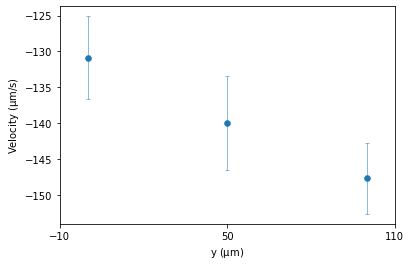

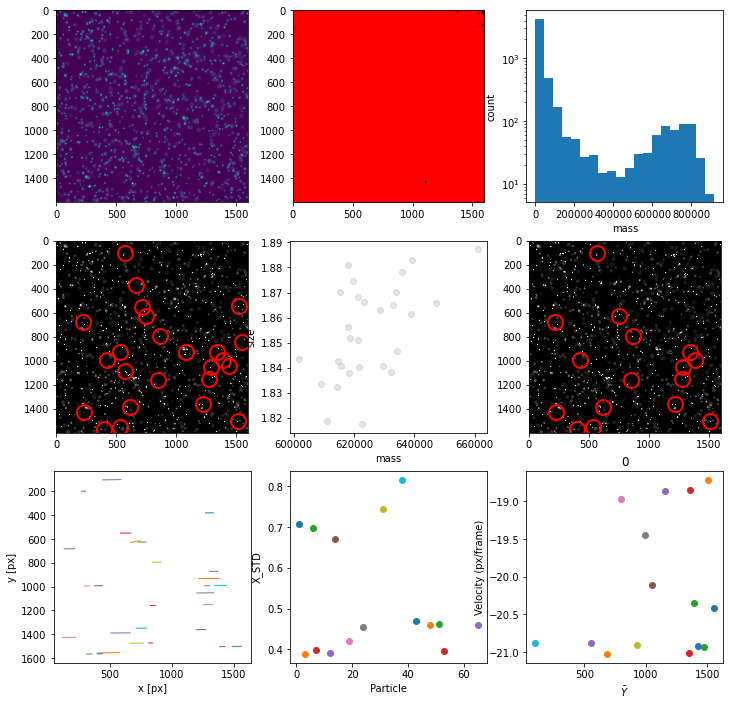

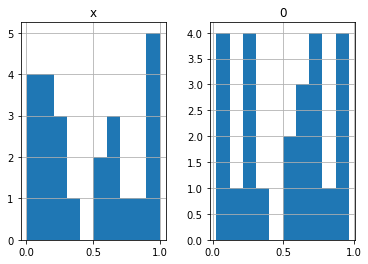

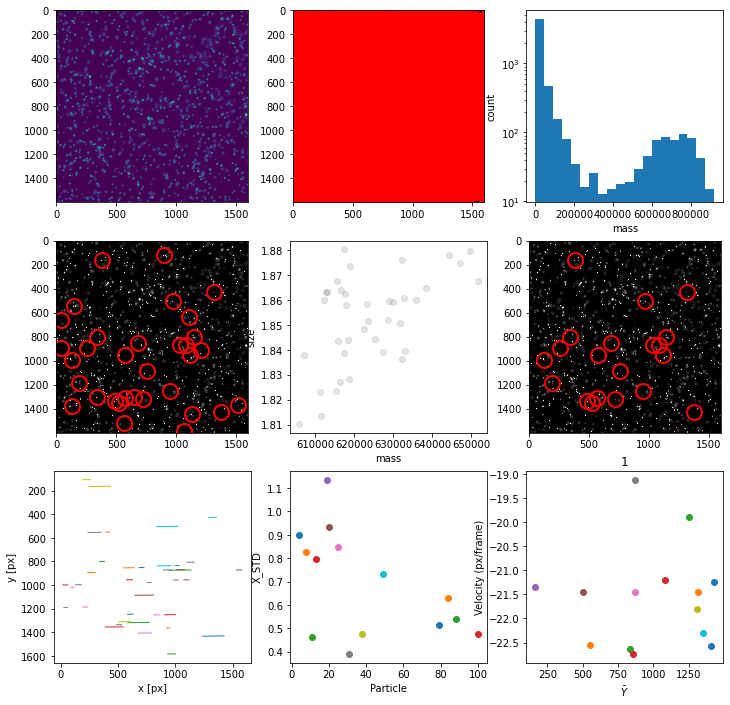

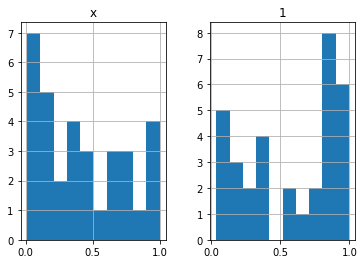

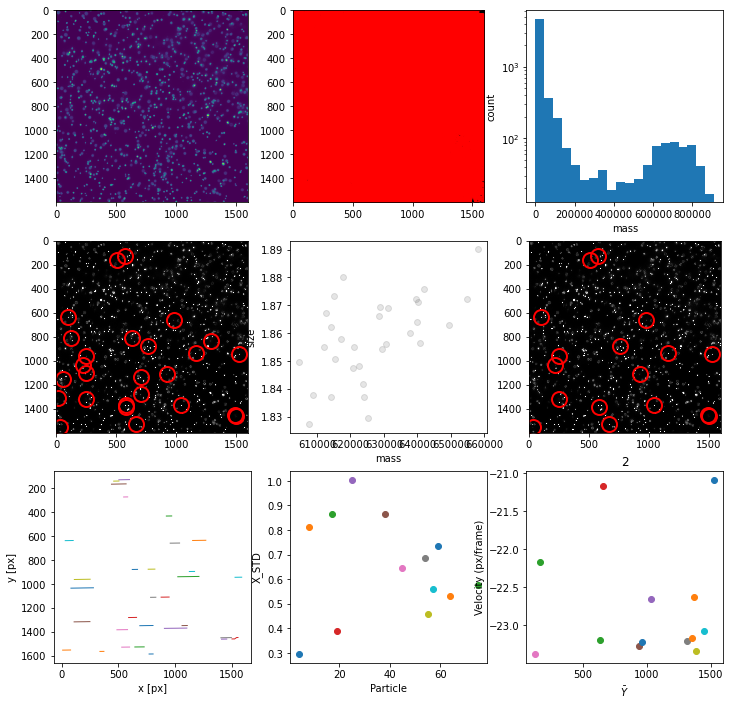

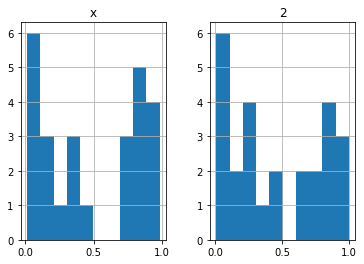

In [12]:
# run
# testSample_1perSec_per50um_per0.5s_N3T10.tif is arranged with a size of 3x10 * X * Y, where N=3 and T=10, labelled according to (N=1,T=1), (N=1, T=2), (N=1, T=3), ...

fig, ax = plt.subplots()

n = 3          # number of points for extracting the velocity along the z direction
Nperz = 10     # identical to T: here 10 snapshots are taken for each Z height
tgap = 0.5     # Delta_T: gap between two time stamps (s)
z = np.linspace(0, 100, n)
v = np.zeros(n)
v_std = np.zeros(n)
minMassArray = [6e5, 6e5, 6e5] # should be an array of size n, as the minimal mass to avoid "spurious" particles
for i in range(n):
    print("Current z number: {0}".format(i))
    try:
        y1, v1, raw1 = processFrames(imstack[(i*Nperz):(i*Nperz+Nperz), :, :], minD = 9, minMass=minMassArray[i], maxSize=1.9, linkLen=20, maxSTD=10, percentile=99, sizeRange=[0, 1.8e3], predictor=predict, figtitle=str(i))
        v[i] = v1.mean()
        v_std[i] = v1.std()
    except:
        pass

ax.errorbar(z, v*umPerPx/tgap, yerr=v_std*umPerPx/tgap, marker='o', capsize=2, linestyle='none', linewidth=0.5, mew=0.5)
ax.set(xlabel=r'y ($\mathrm{\mu m}$)', ylabel=r'Velocity ($\mathrm{\mu m/s}$)', xticks=np.linspace(-10, 110, 3))


In [13]:
raw1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,1586.827261,805.281395,659754.319020,1.879700,0.130764,41371.611660,1627224.0,0.009493,0,2
0,1565.136937,372.220094,663875.596166,1.872975,0.094477,41349.202668,1650283.0,0.009355,0,3
0,1527.523281,726.769952,613057.276473,1.871038,0.010972,40766.568893,1513724.0,0.010241,0,4
0,1448.904312,1552.487019,620794.310283,1.874535,0.084085,40742.182638,1539162.0,0.010063,0,6
0,1370.039333,1102.452029,624471.362129,1.847562,0.104265,41607.565157,1517714.0,0.010213,0,8
...,...,...,...,...,...,...,...,...,...,...
9,896.482781,1124.404756,602394.997037,1.892157,0.089544,40193.147188,1508135.0,0.010286,9,107
9,879.417861,622.041286,624379.583549,1.860611,0.088807,40817.165258,1571549.0,0.009851,9,108
9,636.651365,1153.254776,617491.283873,1.899873,0.062545,39118.377026,1656966.0,0.009319,9,75


# Strain field from moving-least-square methods

In [14]:
import pandas as pd
import skimage.io as skio

In [15]:
raw1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,1586.827261,805.281395,659754.319020,1.879700,0.130764,41371.611660,1627224.0,0.009493,0,2
0,1565.136937,372.220094,663875.596166,1.872975,0.094477,41349.202668,1650283.0,0.009355,0,3
0,1527.523281,726.769952,613057.276473,1.871038,0.010972,40766.568893,1513724.0,0.010241,0,4
0,1448.904312,1552.487019,620794.310283,1.874535,0.084085,40742.182638,1539162.0,0.010063,0,6
0,1370.039333,1102.452029,624471.362129,1.847562,0.104265,41607.565157,1517714.0,0.010213,0,8
...,...,...,...,...,...,...,...,...,...,...
9,896.482781,1124.404756,602394.997037,1.892157,0.089544,40193.147188,1508135.0,0.010286,9,107
9,879.417861,622.041286,624379.583549,1.860611,0.088807,40817.165258,1571549.0,0.009851,9,108
9,636.651365,1153.254776,617491.283873,1.899873,0.062545,39118.377026,1656966.0,0.009319,9,75


particle
2       [Line2D(_line0)]
3       [Line2D(_line1)]
4       [Line2D(_line2)]
6       [Line2D(_line3)]
8       [Line2D(_line4)]
17      [Line2D(_line5)]
18      [Line2D(_line6)]
19      [Line2D(_line7)]
21      [Line2D(_line8)]
22      [Line2D(_line9)]
25     [Line2D(_line10)]
27     [Line2D(_line11)]
38     [Line2D(_line12)]
42     [Line2D(_line13)]
45     [Line2D(_line14)]
54     [Line2D(_line15)]
55     [Line2D(_line16)]
57     [Line2D(_line17)]
59     [Line2D(_line18)]
60     [Line2D(_line19)]
64     [Line2D(_line20)]
75     [Line2D(_line21)]
77     [Line2D(_line22)]
79     [Line2D(_line23)]
80     [Line2D(_line24)]
88     [Line2D(_line25)]
89     [Line2D(_line26)]
101    [Line2D(_line27)]
103    [Line2D(_line28)]
107    [Line2D(_line29)]
108    [Line2D(_line30)]
dtype: object

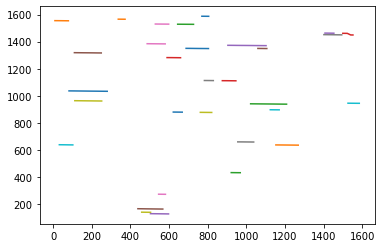

In [16]:
# Inspect the profile

fig, ax = plt.subplots()
raw1.groupby('particle').apply(lambda x: ax.plot(x['x'], x['y']))
# raw1[raw1['particle'] == 100]

In [17]:
rc = 3000   # cut-off radius

def Pij(b):    # b: df
    if b.empty:
        # return [[0, 0, 0]]
        return [[0, 0, 0, 0, 0, 0]]
    else:
        # return [[1, b['x'].iloc[0], b['y'].iloc[0]]]   # size 1x3
        return [[1, b['x'].iloc[0], b['y'].iloc[0],
                    b['x'].iloc[0]*b['y'].iloc[0], 
                    b['x'].iloc[0]**2, b['y'].iloc[0]**2]]

def bij(b):    # b: df
    if b.empty:
        return [[0, 0]]
    else:
        return [[b['x'].iloc[0], b['y'].iloc[0]]]    # size 1x2
    
def vij(b):    # b: T*N*1*2
    bshape = b.shape
    vij = np.zeros(bshape)
    for it in range(bshape[0]):
        for i in range(bshape[1]):
            if (it > 0) & (it < bshape[0] - 1):
                if (b[it-1, i, 0, 0] > 0) & (b[it+1, i, 0, 0] > 0):
                    vij[it, i, 0, 0] = (b[it+1, i, 0, 0] - b[it-1, i, 0, 0])/2
                if (b[it-1, i, 0, 1] > 0) & (b[it+1, i, 0, 1] > 0):
                    vij[it, i, 0, 1] = (b[it+1, i, 0, 1] - b[it-1, i, 0, 1])/2
            # boundary of time
            if (it == 0):
                if (b[it, i, 0, 0] > 0) & (b[it+1, i, 0, 0] > 0) & (b[it+2, i, 0, 0] > 0):
                    vij[it, i, 0, 0] = (-3*b[it, i, 0, 0] + 4*b[it+1, i, 0, 0] - b[it+2, i, 0, 0])/2
                if (b[it, i, 0, 1] > 0) & (b[it+1, i, 0, 1] > 0) & (b[it+2, i, 0, 1] > 0):
                    vij[it, i, 0, 1] = (-3*b[it, i, 0, 1] + 4*b[it+1, i, 0, 1] - b[it+2, i, 0, 1])/2
            if (it == bshape[0] - 1):
                if (b[it, i, 0, 0] > 0) & (b[it-1, i, 0, 0] > 0) & (b[it-2, i, 0, 0] > 0):
                    vij[it, i, 0, 0] = (3*b[it, i, 0, 0] - 4*b[it-1, i, 0, 0] + b[it-2, i, 0, 0])/2
                if (b[it, i, 0, 1] > 0) & (b[it-1, i, 0, 1] > 0) & (b[it-2, i, 0, 1] > 0):
                    vij[it, i, 0, 1] = (3*b[it, i, 0, 1] - 4*b[it-1, i, 0, 1] + b[it-2, i, 0, 1])/2

    return vij    # size T*N*1*2
            
def f(x, b):  # x: df; b: 1x3
    d = np.sqrt((x['x'].iloc[0] - b[0][0])**2 + (x['y'].iloc[0] - b[0][1])**2)
    if d <= rc:
        # return 1 - (d/rc)**2
        return (np.exp(1-(d/rc)**2) - 1)/(np.e - 1)
    else:
        return 0
    
def invA(x, b, P):   # b - N*1*2, P - N*1*3
    nA = P.shape[2]
    A = np.zeros([nA, nA])
    bshape = b.shape 
    for i in range(bshape[0]):
        A = A + f(x, b[i]) * np.matmul(P[i].T, P[i])
    A = np.array(A)
    return np.linalg.inv(A)

def B(x, b, P):    # x: df, b - N*1*2, P - N*1*3
    B = []
    bshape = b.shape
    for i in range(bshape[0]):
        Pnow = f(x, b[i])*P[i]
        B.append(Pnow[0])
    B = np.array(B)
    return B.T  # N(P)*N

def rateField(vx, vy, nx, ny): # v: nx*ny; 
    F = np.zeros([len(nx), len(ny), 3]) # xx, xy, yx, yy
    for i in range(len(nx)):
        for j in range(len(ny)):
            try: 
                F[i, j, 0] = 2 * (vx[i+1, j] - vx[i-1, j]) / (nx[i+1] - nx[i-1]) 
                F[i, j, 1] = (vy[i+1, j] - vy[i-1, j]) / (nx[i+1] - nx[i-1]) + (vx[i, j+1] - vx[i, j-1]) / (ny[j+1] - ny[j-1]) 
                F[i, j, 2] = 2 * (vy[i, j+1] - vy[i, j-1]) / (ny[j+1] - ny[j-1]) 
            except:
                pass
    return F

def constructHexBin(data, res=500):   # resolution for each grid (mesh resolution): the larger athe coarser
    fig = plt.figure()
    b = []
    P = []
    for it in range(data['frame'].max()+1):
        Bit = []
        Pit = []
        for ip in range(data['particle'].max()+1):
            ti = data[(data['particle'] == ip) & (data['frame'] == it)]
            Bit.append(bij(ti))
            Pit.append(Pij(ti))
        b.append(Bit)     # T*N*1*2
        P.append(Pit)     # T*N*1*3
    
    b = np.array(b)

    P = np.array(P)

    v = vij(b)
    v = np.array(v)

    xrange = [data['x'].min(), data['x'].max()]
    yrange = [data['y'].min(), data['y'].max()]
    # xrange = [0, 1047]
    # yrange = [0, 2091]
    # f = interp2d(x, y, C)
    nx = np.arange(xrange[0], xrange[1], res)
    ny = np.arange(yrange[0], yrange[1], res)

    # X, Y = np.meshgrid(nx, ny)

    # for it in range(0, data['frame'].max()+1, 5):
    vxData = []
    vyData = []
    FData = []
    for it in range(0, data['frame'].max()+1, 1):
        vx = np.zeros([len(nx), len(ny)])
        vy = np.zeros([len(nx), len(ny)])
        for nix, ix in enumerate(nx):
            # display(nix)
            for niy, iy in enumerate(ny):
                X = pd.DataFrame({'x': [ix], 'y': [iy]})
                # vx[nix, niy] = np.matmul( np.matmul(Pij(X), invA(X, b[it], P[it])), 
                #                           np.matmul(B(X, b[it], P[it]), v[it, :, :, 0]))
                Pnow = np.array(Pij(X))
                # display(Pnow.shape)
                invAnow = invA(X, b[it], P[it])
                # display(invAnow.shape)
                Bnow = B(X, b[it], P[it])
                # display(Bnow.shape)

                vnow = v[it, :, :, 0]
                # display(vnow.shape)
                vx[nix, niy] = np.matmul( np.matmul(Pnow, invAnow), 
                                          np.matmul(Bnow, vnow))
                vnow = v[it, :, :, 1]
                # display(vnow.shape)
                vy[nix, niy] = np.matmul( np.matmul(Pnow, invAnow), 
                                          np.matmul(Bnow, vnow))

        vxData.append(vx)
        vyData.append(vy)

        F = rateField(vx, vy, nx, ny)
        FData.append(F)

    # frame = pims.open(filename+'/sr0.3_70ms022yielding-crop0000.tif')
    # frame = frame[0]
    # # ax.imshow(frame, cmap='Greens', alpha=0.5)

    # ax.imshow(frame, cmap='gray', alpha=0.5)
    # ax.plot(x, y, C, 'o', fillstyle='none', mew=0.5)
    # ax.plot_surface(X, Y, heatData.T, cmap='jet', edgecolor='none')
    # cmap = (mpl.colors.ListedColormap(colmap))
    # bounds = areaBins
    # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    # fig.colorbar(
    #     mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #     ticks=bounds,
    #     spacing='proportional',
    #     orientation='vertical',
    #     label=r'Area (mm^2)',
    # )
    # plt.axes().set_aspect('equal')

    # ax.plot(x, y, C, 'o', fillstyle='none')

    return vxData, vyData, FData  # Output vx, vy and strain field tensor (F, X*Y*3 size)

In [18]:
vxData, vyData, FData = constructHexBin(raw1, res=200)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Velocity (um/s)')

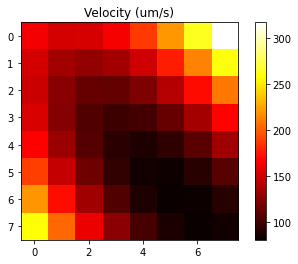

In [19]:
fig, ax = plt.subplots()

v_show = np.sqrt(vxData[5]**2 + vyData[5]**2)*umPerPx/tgap
ax1 = ax.imshow(v_show.T, cmap='hot')
fig.colorbar(ax1, ax=ax)
ax.set_title('Velocity (um/s)')

# Morphological extraction of hiPSC aggregates

The aggregate morphology was extracted from an image-processing workfllow that
* Determines the edges of the aggregate
* Erode to get a clear separation between aggregates, and label each aggregate
* Recover the original shape and perform elliptical fitting
* Extract all the morphological parameters

In [20]:
from PIL import Image

import skimage.io as skio
from skimage.filters import try_all_threshold, difference_of_gaussians, window, threshold_yen, threshold_otsu, scharr, threshold_li, median

from skimage.measure import label, regionprops

from skimage.feature import peak_local_max
from skimage.segmentation import watershed

from scipy import ndimage as ndi

from skimage.feature import blob_dog, blob_log, blob_doh

from scipy.fft import fftn, fftshift

from numba import jit

from skimage.morphology import erosion, binary_erosion, disk, square


In [21]:
# from numba import jit

# @jit
def processEdgeFill(Istack, cropThres, mmPerPixel, diskDia=8, Dmin=None, Dmax=None, closing=True, sigmaGauss=0.5):
    # display(len(Istack))

    everyN = 10

    fig, ax = plt.subplots(len(Istack)//everyN + 1, 5, figsize=(14, 3*(len(Istack)//everyN + 1)))
    
    [axi.set_axis_off() for axi in ax.ravel()];
    data = pd.DataFrame()
    
    Amin = 0
    if not (Dmin==None):
        Amin = np.pi*(Dmin**2)/4
    Amax = 10000000
    if not (Dmax==None): 
        Amax = np.pi*(Dmax**2)/4

    for i, Imnow in enumerate(Istack): 
        # Gaussian preprocessing
        from skimage.filters import gaussian
        I = gaussian(Imnow, sigmaGauss)
        [axi.set_axis_off() for axi in ax.ravel()];

        # edge
        from scipy.ndimage.filters import convolve
        s_x = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])
        s_y = s_x.T # transposes the matrix
        res_x = convolve(I, s_x)
        res_y = convolve(I, s_y)
        G = np.sqrt(res_x**2 + res_y**2)
        if (i % everyN == 0):
            ax[i // everyN, 0].imshow(G, cmap='gray')
            ax[i // everyN, 0].set(title='Edges ' + str(i))

        # Thresholding
        from skimage.filters import threshold_otsu
        threshold_level = threshold_otsu(G[cropThres[0]:cropThres[1], :])
        bw = G > threshold_level
        if (i % everyN == 0):
            Gthresh = G
            Gthresh[cropThres[0]:cropThres[1], :] = Gthresh.max()
            ax[i // everyN, 1].imshow(Gthresh, cmap='gray')
            ax[i // everyN, 1].set(title='Thresh')

        # Clearing
        from skimage.morphology import remove_small_objects, disk
        bw_cleared = remove_small_objects(bw, 500)
        # footprint = square(2)
        # bw_cleared = erosion(bw_cleared, footprint)
        if (i % everyN == 0):
            ax[i // everyN, 2].imshow(bw_cleared, cmap='gray')
            ax[i // everyN, 2].set(title='removeSmall')

        if closing:
            # Closing
            from skimage.morphology import binary_closing, binary_dilation, disk
            # display(bw_cleared.max())
            bw_close = np.invert(binary_closing(bw_cleared, selem=disk(diskDia)))
            # bw_open = binary_opening(bw_cleared, selem=disk(10))
            if (i % everyN == 0):
                ax[i // everyN, 3].imshow(bw_close, cmap='gray')
                ax[i // everyN, 3].set(title='Close gap')

            # Labeling
            from skimage.measure import label, regionprops_table
            bw_label = label(bw_close)
        else:
            # Closing
            from skimage.morphology import binary_closing, binary_dilation, disk
            # display(bw_cleared.max())
            # bw_close = np.invert(binary_closing(bw_cleared, selem=disk(diskDia)))
            # bw_open = binary_opening(bw_cleared, selem=disk(10))
            if (i % everyN == 0):
                ax[i // everyN, 3].set(title='No closing')

            # Labeling
            from skimage.measure import label, regionprops_table
            bw_label = label(bw_cleared)

        if (i % everyN == 0):
            ax[i // everyN, 4].imshow(I, cmap='plasma', interpolation=None)
            # display(I.max())
            ax[i // everyN, 4].set(title='Lb after dilate')

        regprops = regionprops_table(bw_label, 
                                     properties=['label', 'area'])
        regprops['area'] = regprops['area'] * (mmPerPixel**2)
        for j, j_label in enumerate(regprops['label']):
            if (regprops['area'][j] >= Amin) and (regprops['area'][j] <= Amax):
                bw_label_j = binary_dilation((bw_label == j_label), disk(diskDia)).astype(np.uint8)
                bw_label_j_label = label(bw_label_j)
                # display(bw_label_j_label)
                thisLabel = regionprops_table(bw_label_j_label, properties=['area', 'perimeter', 'orientation', 'centroid', 'minor_axis_length', 'major_axis_length'])
                # display(len(thisLabel['area']))

                # extract gap width
                y0 = thisLabel['centroid-1'][0] # pixel
                imgy = Imnow[:, int(y0)].astype(np.int)
                # return imgy
                # imgy = np.convolve(imgy, np.ones(5)/5, 'same')
                # imgy = np.convolve(imgy, [1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -1, -1], 'same')
                thres = imgy[:50].mean()
                maxpk = imgy.max()
                locs = np.where(imgy > (2*thres + maxpk)/3)[0]
                # dimgy = np.diff(imgy)
                loc1 = locs[0]
                loc2 = locs[-1]
            
                thisData = {'Time': i,
                            'Label': j_label,
                            'Area': thisLabel['area'][0]*(mmPerPixel**2),
                            'Perimeter': thisLabel['perimeter'][0]*(mmPerPixel),
                            'x': thisLabel['centroid-0'][0]*(mmPerPixel),
                            'y': thisLabel['centroid-1'][0]*(mmPerPixel),
                            'orient': thisLabel['orientation'][0],
                            'MajLen': thisLabel['major_axis_length'][0]*(mmPerPixel),
                            'MinorLen': thisLabel['minor_axis_length'][0]*(mmPerPixel),
                            'labelImg': bw_label_j,
                            'gapWidth': (loc2-loc1)*mmPerPixel,
                            }
                data = data.append(thisData, ignore_index=True)
                if (i % everyN == 0):
                    # display(bw_label_j)
                    ax[i // everyN, 4].imshow(np.invert(bw_label_j), alpha=0.1, cmap='gray')

        # for j in regprops:
        #     area = j.area
        #     peri = j.perimeter
        #     ctr = j.centroid
        #     data = data.append({'Time': i,
        #                         'Area': area,
        #                         'Perimeter': peri,
        #                         'x': ctr[0],
        #                         'y': ctr[1]
        #                         }, ignore_index=True)
    return data

# not for the same trajectory
# def processPlot(data, nxBins=20, nareaBins=6, imgC=400, plotXLim=None, y='circ'):
#     # To consolidate based on bins (not tracking an identical cell)
#     # Dmin, Dmax - mm
#     # imgW = imstack[0].shape[0]
#     # datafiltered = data[(data['Area'] > Amin) & (data['Area'] < Amax)]

#     datafiltered = data.copy()
#     datafiltered['x'] =  imgC - datafiltered['x']
#     datafiltered['circ'] = (datafiltered['Perimeter']**2)/np.pi/4 / datafiltered['Area']
#     datafiltered['hdia'] = 4*datafiltered['Area'] / datafiltered['Perimeter']
#     datafiltered['strain'] = np.log(datafiltered['MajLen']/datafiltered['MinorLen'])

#     fig, ax = plt.subplots()
#     xBins = np.linspace(-imgC, imgC, nxBins)
#     areaBins = np.linspace(datafiltered['Area'].min(), datafiltered['Area'].max(), nareaBins)

#     colmap = sns.color_palette('viridis', n_colors=len(areaBins)-1)
#     for j, jarea in enumerate(areaBins[:-1]):
#         xData = []
#         areaData = []
#         for i, ibin in enumerate(xBins[:-1]):
#             dataThis = datafiltered[(datafiltered['x'] >= ibin) & (datafiltered['x'] < xBins[i+1]) & (datafiltered['Area'] >= jarea) & (datafiltered['Area'] < areaBins[j+1])]
#             dataThis = dataThis.dropna()
#             dataThis[y] = abs(dataThis[y])
#             ax.errorbar(dataThis['x'].mean(), dataThis[y].mean(),
#                         xerr=dataThis['x'].std(),
#                         yerr=dataThis[y].std(),
#                         capsize=2,
#                         mew=0.5,
#                         linewidth=0.5,
#                         marker='o',
#                         color=colmap[j],
#                         markersize=np.sqrt(dataThis['Area'].mean())*50,
#                         fillstyle='none')
#             xData.append(dataThis['x'].mean())
#             areaData.append(dataThis[y].mean())
#         ax.plot(xData, areaData, color=colmap[j], linewidth=0.5)
#     if not plotXLim == None:
#         ax.set(xlim=plotXLim)
#     ax.set(xlabel='Flow dist from center (mm)', ylabel=y)
#     # ax.hlines(1, xmin=-imgC, xmax=imgC, color='k', linestyle='--', linewidth=0.5)
#     import matplotlib as mpl
#     cmap = (mpl.colors.ListedColormap(colmap))
#     bounds = areaBins
#     norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#     display(bounds)
#     fig.colorbar(
#         mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
#         ticks=bounds,
#         spacing='proportional',
#         orientation='vertical',
#         label=r'Area (mm^2)',
#     )
#     return ax


# For individual trajectories
def labelVideo(data, folder=None):
    # add label to the EBs for each frame, then output to files
    from matplotlib.patches import Ellipse
    def eachLabel(df, ax):
        nowLabel = df['Label'].iloc[0]
        x = df['x'].iloc[0] / mmPerPixel
        y = df['y'].iloc[0] / mmPerPixel
        orient = df['orient'].iloc[0]
        majlen = df['MajLen'].iloc[0] / mmPerPixel
        minlen = df['MinorLen'].iloc[0] / mmPerPixel
        ax.add_patch(Ellipse((y, x), width=majlen, height=minlen, angle=90-orient*180/np.pi,
                     edgecolor='k',
                     facecolor='none',
                     linewidth=0.5))
        # ax.text(y, x, str(nowLabel))
        ax.text(y, x, str(int(nowLabel)), bbox=dict(fill=False, edgecolor='k', linewidth=0), fontsize=6)
        
    nowTime = int(data['Time'].iloc[0])
    fig, ax = plt.subplots()
    ax.imshow(Istack[nowTime], cmap='Greens')
    ax.set_axis_off()
    data.groupby('Label').apply(lambda df: eachLabel(df, ax))
    fig.savefig(folder+'/p'+str(nowTime)+'.jpg')
    plt.close()
    

def extractTraj(data, loc, label):
    # Extract properties of a trajectory (identical EB)
    traj= pd.DataFrame()
    for i, iloc in enumerate(loc):
        dataNow = data[(data['Time'] == iloc) & (data['Label'] == label[i])]
        traj = traj.append(dataNow)
    return traj

def extractMorph(Istack, data, loc, label, traj, imgC, drawEllipse=False, mmPerPixel=None):
    from skimage.color import gray2rgb
    # import matplotlib as mpl
    # Extract properties of a trajectory (identical EB)
    wr = []
    hr = []
    imgToPlot = []
    for i, iloc in enumerate(loc):
        dataNow = data[(data['Time'] == iloc) & (data['Label'] == label[i])]
        labelimg = dataNow['labelImg'].values[0]
        x0 = np.where(labelimg)[0].min()
        x1 = np.where(labelimg)[0].max()
        y0 = np.where(labelimg)[1].min()
        y1 = np.where(labelimg)[1].max()
        imgToShow = gray2rgb(Istack[iloc].copy()/Istack[iloc].max())*[0, 1, 0]
        imgToShow[np.where(labelimg==False)] = [1, 1, 1]
        if drawEllipse:
            padLen = 10
            imgToPlot.append(imgToShow[(x0-padLen):(x1+padLen), (y0-padLen):(y1+padLen)])
            wr.append(y1-y0+padLen*2)
            # hr.append(x1-x0+padLen*2)
        else:
            imgToPlot.append(imgToShow[x0:x1, y0:y1])
            wr.append(y1-y0)
            # hr.append(x1-x0)

    fig, axs = plt.subplots(1, len(loc), figsize=(len(loc), 1), gridspec_kw={'width_ratios': wr})
    # fig, axs = plt.subplots(len(loc), 1, figsize=(1, len(loc)), gridspec_kw={'height_ratios': hr})


    for i, iloc in enumerate(loc):
        axs[i].imshow(imgToPlot[i])
        axs[i].set(title='{dist:.2f}'.format(dist=imgC-traj['y'].iloc[i]))
        # axs[i].title.set_fontsize(6)
        if drawEllipse:
            from matplotlib.patches import Ellipse
            dataNow = data[(data['Time'] == iloc) & (data['Label'] == label[i])]
            labelimg = dataNow['labelImg'].values[0]
            x0 = np.where(labelimg)[0].min()
            x1 = np.where(labelimg)[0].max()
            y0 = np.where(labelimg)[1].min()
            y1 = np.where(labelimg)[1].max()
            x = dataNow['x'].iloc[0] / mmPerPixel
            y = dataNow['y'].iloc[0] / mmPerPixel
            orient = dataNow['orient'].iloc[0]
            majlen = dataNow['MajLen'].iloc[0] / mmPerPixel
            minlen = dataNow['MinorLen'].iloc[0] / mmPerPixel
            axs[i].add_patch(Ellipse((y-y0+padLen, x-x0+padLen), width=majlen, height=minlen, angle=90-orient*180/np.pi,
                             edgecolor='k',
                             facecolor='none',
                             linewidth=0.5))
            xref, yref = dataOp.refLine(lambda p: np.tan(np.pi/2 - orient)*(p-(y-y0+padLen)) + (x-x0+padLen), xin=np.linspace(0, x1-x0+2*padLen, 10))
            axs[i].plot(xref, yref, color='k', linewidth=0.5)

            xref, yref = dataOp.refLine(lambda p: np.tan(np.pi - orient)*(p-(y-y0+padLen)) + (x-x0+padLen), xin=np.linspace(0, x1-x0+2*padLen, 10))
            axs[i].plot(xref, yref, color='k', linewidth=0.5)

    [axi.set_axis_off() for axi in axs.ravel()];
    fig.tight_layout(pad=0.2)
    return fig, axs

def plot_traj(axs, traj, imgC, fill_between=False, **kwargs):
    traj['circ'] = np.pi*4*traj['Area']/(traj['Perimeter']**2)
    traj['hdia'] = 4*traj['Area']/traj['Perimeter']
    # traj['strain'] = np.log(traj['MajLen']/traj['hdia'])
    traj['strain'] = np.log(traj['MajLen']/traj['MinorLen'])
    traj['flow_strain'] = np.log(9/traj['gapWidth'])

    ## plotted against position
    xHead = 1
    if fill_between:
        x = np.linspace(-xHead*1.5, xHead*1.5, 18)
        xmean = []
        y0 = []
        y0std = []

        y1 = []
        y1std = []

        y2 = []
        y2std = []

        for ix in range(len(x)-1):
            loc = np.where((imgC-traj['y'] > x[ix]) & (imgC-traj['y'] <= x[ix+1]))

            xmean.append(imgC-traj['y'].iloc[loc].mean())
            display(imgC-traj['y'].iloc[loc])

            temp = np.pi/2-np.abs(traj['orient'].iloc[loc])
            y0.append(temp.mean())
            display(temp)

            y0std.append(temp.std())

            y1.append(traj['Area'].iloc[loc].mean())
            y1std.append(traj['Area'].iloc[loc].std())

            y2.append(traj['strain'].iloc[loc].mean())
            y2std.append(traj['strain'].iloc[loc].std())
        
        xmean = np.array(xmean)
        # display(xmean)

        y0 = np.array(y0)
        display(y0)
        y0std = np.array(y0std)
        display(y0std)
        y1 = np.array(y1)
        y1std = np.array(y1std)
        y2 = np.array(y2)
        y2std = np.array(y2std)
        
        axs[0].plot(xmean, (y0)*180/np.pi, color = 'b', linewidth=1)
        axs[0].fill_between(xmean, (y0-y0std)*180/np.pi, (y0+y0std)*180/np.pi, facecolor = 'b', alpha=0.2, linewidth=0.5)
        axs[1].plot(xmean, y1, color = 'b', linewidth=1)
        axs[1].fill_between(xmean, y1-y1std, y1+y1std, facecolor = 'b', alpha=0.2)
        axs[2].plot(xmean, y2, color = 'b', linewidth=1)
        axs[2].fill_between(xmean, y2-y2std, y2+y2std, facecolor = 'b', alpha=0.2, linewidth=0.5)
    else:
        axs[0].plot(imgC-traj['y'], (np.pi/2-np.abs(traj['orient']))*180/np.pi, markersize=traj['Area'].iloc[0]*200, linewidth=0, **kwargs)
        axs[0].set(xlim=[-xHead, xHead], xticks=np.linspace(-xHead, xHead, 3), ylabel=r'$\theta$ (degrees)', ylim=[0, 200], yticks=np.linspace(0, 180, 5), xlabel=r'$x_\mathrm{c}$ (mm)')
        axs[0].axvline(0, 0, 200, color='k', linestyle='--', linewidth=0.5)

        axs[1].plot(imgC-traj['y'], traj['Area'], markersize=traj['Area'].iloc[0]*200, linewidth=0, **kwargs)
        axs[1].set(xlim=[-xHead, xHead], xticks=np.linspace(-xHead, xHead, 3), ylabel=r'Area ($\mathrm{mm^2}$)', ylim=[0, 4e-2], xlabel=r'$x_\mathrm{c}$ (mm)')
        axs[1].axvline(0, 0, 1, color='k', linestyle='--', linewidth=0.5)

        axs[2].plot(imgC-traj['y'], traj['strain'], markersize=traj['Area'].iloc[0]*200, linewidth=0, **kwargs)
        axs[2].set(xlim=[-xHead, xHead], xticks=np.linspace(-xHead, xHead, 3), ylim=[0, 0.6], ylabel='Strain', xlabel=r'$x_\mathrm{c}$ (mm)')
        axs[2].axvline(0, 0, 1, color='k', linestyle='--', linewidth=0.5)
        axs[2].plot(imgC-traj['y'], traj['flow_strain'], 'k-', linewidth=0.5)

        axs[3].plot(imgC-traj['y'], traj['flow_strain'], markersize=traj['Area'].iloc[0]*200, linewidth=0, **kwargs)
        axs[3].set(xlim=[-xHead, xHead], xticks=np.linspace(-xHead, xHead, 3), ylabel='Flow strain', xlabel=r'$x_\mathrm{c}$ (mm)')
        axs[3].axvline(0, 0, 1, color='k', linestyle='--', linewidth=0.5)

        axs[3].legend()

        ## plotted against flow strain
        
        # axs[0].plot(traj['flow_strain'], np.pi/2-np.abs(traj['orient']), markersize=traj['Area'].iloc[0]*200, **kwargs)
        maxStrainPrior = traj[traj['y'] < imgC]
        # axs[4].plot(traj['flow_strain'], traj['strain'], markersize=traj['Area'].iloc[0]*00, linewidth=traj['Area'].iloc[0]*20, color='k')
        for i in range(len(traj['flow_strain'])-1):
            if (traj['y'].iloc[i] > imgC) & (traj['y'].iloc[i+1] < imgC):
                axs[4].arrow(traj['flow_strain'].iloc[i], traj['strain'].iloc[i], traj['flow_strain'].iloc[i+1]-traj['flow_strain'].iloc[i], traj['strain'].iloc[i+1]-traj['strain'].iloc[i], color='k', linewidth=traj['Area'].iloc[0]*10, length_includes_head=True, linestyle='none')
                axs[4].plot(traj['flow_strain'].iloc[i:(i+2)], traj['strain'].iloc[i:(i+2)], color='k', linewidth=traj['Area'].iloc[0]*10, linestyle='--')
            # elif (traj['y'].iloc[i] < imgC): ## after
            #     axs[4].arrow(traj['flow_strain'].iloc[i], traj['strain'].iloc[i], traj['flow_strain'].iloc[i+1]-traj['flow_strain'].iloc[i], traj['strain'].iloc[i+1]-traj['strain'].iloc[i], head_width=0.05, head_length=0.05, color='k', linewidth=traj['Area'].iloc[0]*10, length_includes_head=True)
            else:
                axs[4].plot(traj['flow_strain'].iloc[i:(i+2)], traj['strain'].iloc[i:(i+2)], color='k', linewidth=traj['Area'].iloc[0]*10)
        axs[4].fill(traj['flow_strain'], traj['strain'], alpha=0.2, color=kwargs['color'], linestyle='none', linewidth=0)
        # axs[4].plot(traj[traj['y'] > imgC]['flow_strain'], traj[traj['y'] > imgC]['strain'], markersize=traj['Area'].iloc[0]*100, fillstyle='none', **kwargs)
        # axs[4].plot(traj[traj['y'] <= imgC]['flow_strain'], traj[traj['y'] <= imgC]['strain'], markersize=traj['Area'].iloc[0]*100, fillstyle='none', **kwargs)
        # axs[2].plot(traj['flow_strain'], traj['circ'], markersize=traj['Area'].iloc[0]*200, **kwargs)

        # xHead = 0.8
        # axs[0].set(ylabel=r'$\theta$ (rad)', ylim=[0, 1.8], yticks=np.linspace(0, 1.8, 4))
        # # axs[0].axvline(0, 0, 2, color='k', linestyle='--', linewidth=0.5)

        axs[4].set(xlabel='Flow strain', ylabel=r'Local strain')
        # axs[4].axvline(0, 0, 1, color='k', linestyle='--', linewidth=0.5)
        # xref, yref = dataOp.refLine(lambda x: x, xin=np.linspace(0, 1, 100))
        # axs[4].plot(xref, yref, 'k-', linewidth=0.5)

        # axs[2].set(ylabel='SF', xlabel='Flow strain', ylim=[0, 1])
        # # axs[2].axvline(0, 0, 1, color='k', linestyle='--', linewidth=0.5)

        axs[4].legend()        

    return axs

ImageJ series: invalid metadata or corrupted file ()
/var/folders/l8/j0dzpbj949jc09gqbhmgrnc40000gq/T/ipykernel_60026/4292012497.py:103: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imgy = Imnow[:, int(y0)].astype(np.int)


""


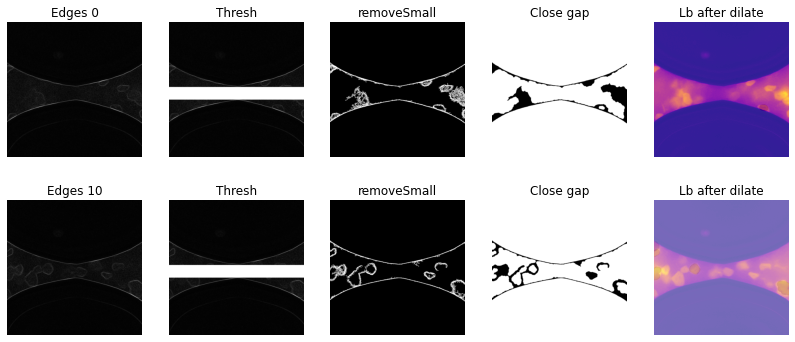

In [22]:
mmPerPixel = 1e-3/0.3135

Istack = skio.imread('hA_10perSec.tif', plugin='tifffile')
data = processEdgeFill(Istack, cropThres=[385, 460], mmPerPixel=mmPerPixel, diskDia=9, Dmin=0, Dmax=0.3)

data.groupby('Time').apply(lambda df: labelVideo(df, 'hA_10perSecOutput'))
# check the output in this folder and select the trajectory of interest

# # loc = [31, 32, 33, 34, 35, 36, 38, 40] 
# # label = [12, 8, 6, 9, 11, 10, 15, 11]
# # traj_1_2 =  extractTraj(data_1, loc, label)
# # figMorph, axMorph = extractMorph(Istack, data_1, loc, label, traj_1_1, imgC=406*mmPerPixel)

# loc = [50, 51, 52, 53, 55, 56, 57, 58, 59]
# label = [7, 6, 6, 5, 7, 5, 6, 4, 4]
# traj_1_3 =  extractTraj(data_1, loc, label)
# figMorph, axMorph = extractMorph(Istack, data_1, loc, label, traj_1_3, imgC=406*mmPerPixel)

# loc = [88, 91, 93, 98, 99, 100]
# label = [4, 6, 8, 3, 3, 3]
# traj_1_4 =  extractTraj(data_1, loc, label)
# figMorph, axMorph = extractMorph(Istack, data_1, loc, label, traj_1_4, imgC=406*mmPerPixel)

# loc = [33, 34, 35, 36, 37, 38, 39, 40, 41, 42] 
# label = [7, 10, 12, 9, 12, 12, 11, 10, 10, 14]
# traj_1_5 =  extractTraj(data_1, loc, label)
# figMorph, axMorph = extractMorph(Istack, data_1, loc, label, traj_1_5, imgC=406*mmPerPixel)


# fig, axs = plt.subplots(5, 1, figsize=(2, 8))

# colmap = sns.color_palette('Set2', n_colors=4)

# # plot_traj(axs, traj_1_1, 406*mmPerPixel, marker='o', fillstyle='none', mew=0.5, linewidth=0.5)
# plot_traj(axs, traj_1_1[traj_1_1['y'] <= 406*mmPerPixel], 406*mmPerPixel, marker='o', fillstyle='none', mew=0.5, linewidth=0, color=colmap[0])
# plot_traj(axs, traj_1_1[traj_1_1['y'] > 406*mmPerPixel], 406*mmPerPixel, marker='o', fillstyle='full', mew=0.5, linewidth=0, color=colmap[0])
# plot_traj(axs, traj_1_1, 406*mmPerPixel, marker=None, linewidth=0.5, color=colmap[0])


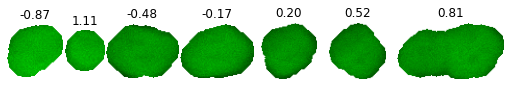

In [23]:
# select the location (# of snapshot, in "loc") and the corresponding label manually based on the folder of the
loc = [5, 6, 7, 8, 9, 10, 11]
label = [4, 3, 3, 5, 7, 6, 3]
traj =  extractTraj(data, loc, label)
figMorph, axMorph = extractMorph(Istack, data, loc, label, traj, imgC=406*mmPerPixel)


In [24]:
# And traj shows all the spatiotemporal morphological information of the aggregate selected
display(traj)

,Time,Label,Area,Perimeter,x,y,orient,MajLen,MinorLen,labelImg,gapWidth
20,5.0,4.0,0.020716,0.549949,1.270750,2.161938,-0.947532,0.186819,0.142265,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.676236
22,6.0,3.0,0.011823,0.400444,0.982437,0.180923,-0.356831,0.125955,0.119627,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.854864
30,7.0,3.0,0.028245,0.646871,1.302065,1.775090,-1.539156,0.221477,0.163151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.424242
34,8.0,5.0,0.028520,0.647965,1.331688,1.464130,-1.374402,0.227609,0.160351,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.280702
43,9.0,7.0,0.029924,0.662272,1.316618,1.092678,-0.776810,0.210146,0.183167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.264753
52,10.0,6.0,0.031817,0.672842,1.303035,0.770419,0.897865,0.213261,0.191926,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.411483
55,11.0,3.0,0.050335,0.950260,1.329896,0.483714,-1.459311,0.364915,0.179096,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.606061
